# 세미프로젝트 파일정리

1. 22년 분기(1~4), 서울시 자치구, 외식 업종, 매출등급 전처리 
2. 위 데이터(키)와 개폐업, 생존율, 최신영업기간 데이터 결합 및 전처리
3. 위 데이터(키,개폐업 등)와 매출 데이터 결합 및 전처리
4. 타입변경, 문자제거 전처리
5. 탐색적 데이터 분석 및 시각화 (EDA)
6. 머신러닝 적용을 위한 주요 데이터 인코딩 전처리
7. 머신러닝 모델링 

# 7. 머신러닝 모델링

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib import font_manager

f_path = "C:\Windows\Fonts\Malgun.ttf"
font_manager.FontProperties(fname=f_path).get_name()

from matplotlib import rc

rc('font', family='Malgun Gothic')

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', color_codes=True)
sns.set_style('whitegrid', {'font.family':'Malgun Gothic'})
import matplotlib.ticker as mticker

In [3]:
추정매출 = pd.read_csv("./서울시 상권분석서비스(상권-추정매출2022).csv", dtype = {'분기당_매출_금액' : 'int64'},  encoding = "ansi")
생활인구 = pd.read_csv("./서울시 상권분석서비스(상권-생활인구2022).csv", encoding = "ansi")
직장인구 = pd.read_csv("./서울시 상권분석서비스(상권-직장인구2022).csv", encoding = "ansi")
상권영역 = pd.read_csv("./서울시 상권분석서비스(상권영역).csv", encoding = "ansi")
법정동코드 = pd.read_csv("./서울시 건축물대장 법정동 코드정보.csv", encoding = "ansi")
매출등급 = pd.read_csv("./필지단위 소상공인 매출등급 정보.csv", encoding = "ansi")
코드변환 = pd.read_csv("./A_CS 코드변환.txt")
분기_업종_구_등급 = pd.read_csv("./년도_업종_구_등급.csv", encoding = "ansi")
등급_개폐업율추가 = pd.read_csv("등급_개폐업율추가.csv", encoding = "ansi")
등급_개폐업_매출추가 = pd.read_csv("기본df_매출df_합.csv", encoding = "ansi")
전처리_타입변경_문자제거 = pd.read_csv(".전처리_타입변경_문자제거.csv", encoding = "ansi")
인코딩 = pd.read_csv(".전처리_인코딩.csv", encoding = "ansi")

# 머신러닝 모델링 임포트

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# !pip install xgboost
# !pip install lightgbm
import xgboost as xgb
import lightgbm as lgbm

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import scikitplot as skplt

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

#!pip install graphviz
from sklearn.tree import export_graphviz
import graphviz

In [5]:
df=인코딩

In [6]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,데이터기준년월,시군구명,서비스_업종_코드,서비스업종,매출등급,매출등급01,개업수,...,연령대_60_이상_매출_건수,점포수,시군구_코드,점포당_매출_금액,업종별_건당_매출_금액,건당_매출_금액,구_번호,업종_번호,상권구분_번호,구번호_유동인구순
0,0,0,0,202203,강남구,CS100001,한식,3.607718,1,116,...,502,5.0,11680,9.851762e+07,61612.020388,61612.020388,25,10,3,25
1,1,1,1,202203,강남구,CS100001,한식,3.607718,1,116,...,13097,90.0,11680,7.882209e+07,46680.804558,46680.804558,25,10,4,25
2,2,2,2,202203,강남구,CS100001,한식,3.607718,1,116,...,2904,33.0,11680,4.408173e+07,34870.609272,34870.609272,25,10,4,25
3,3,3,3,202203,강남구,CS100001,한식,3.607718,1,116,...,6316,91.0,11680,5.280214e+07,35647.210671,35647.210671,25,10,4,25
4,4,4,4,202203,강남구,CS100001,한식,3.607718,1,116,...,67313,252.0,11680,9.441766e+07,36225.028792,36225.028792,25,10,4,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35848,35848,35848,35848,202212,중랑구,CS100010,커피,2.590062,0,42,...,488,3.0,11260,6.372488e+06,9813.893737,9813.893737,4,9,3,15
35849,35849,35849,35849,202212,중랑구,CS100010,커피,2.590062,0,42,...,654,16.0,11260,9.036580e+06,5354.811970,5354.811970,4,9,3,15
35850,35850,35850,35850,202212,중랑구,CS100010,커피,2.590062,0,42,...,450,7.0,11260,1.938422e+06,5378.102259,5378.102259,4,9,3,15
35851,35851,35851,35851,202212,중랑구,CS100010,커피,2.590062,0,42,...,91,11.0,11260,3.272727e+06,12627.148369,12627.148369,4,9,3,15


In [7]:
df=df.iloc[:,3:]

In [8]:
df.describe()

,데이터기준년월,매출등급,매출등급01,개업수,폐업수,개업률,폐업률,1년생존률,3년생존률,5년생존률,...,연령대_60_이상_매출_건수,점포수,시군구_코드,점포당_매출_금액,업종별_건당_매출_금액,건당_매출_금액,구_번호,업종_번호,상권구분_번호,구번호_유동인구순
count,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,...,35853.000000,35853.000000,35853.000000,3.585300e+04,3.585300e+04,3.585300e+04,35853.000000,35853.000000,35853.000000,35853.000000
mean,202207.477031,2.971548,0.548378,29.576465,29.146710,3.843706,3.637009,71.380202,44.482975,32.458718,...,3188.705882,13.495691,11431.427914,4.349221e+07,2.903991e+04,2.903991e+04,13.980364,6.188436,3.074527,14.161800
std,3.356950,0.326234,0.497661,30.510754,35.365378,1.723661,1.488069,6.964092,8.147130,7.852711,...,8073.834028,26.162245,191.798029,5.902376e+07,3.999007e+04,3.999007e+04,7.316063,3.045349,0.644990,7.165584
min,202203.000000,2.056604,0.000000,0.000000,0.000000,0.000000,0.000000,47.900000,23.100000,14.000000,...,0.000000,1.500000,11110.000000,3.750000e+02,1.022727e+02,1.022727e+02,1.000000,1.000000,1.000000,1.000000
25%,202203.000000,2.743243,0.000000,8.000000,9.000000,2.600000,2.500000,67.400000,38.800000,27.100000,...,211.000000,3.000000,11260.000000,1.184989e+07,1.076712e+04,1.076712e+04,7.000000,3.000000,3.000000,8.000000
50%,202206.000000,2.897260,1.000000,17.000000,16.000000,3.500000,3.500000,71.300000,45.600000,33.300000,...,755.000000,6.000000,11440.000000,2.736878e+07,2.177410e+04,2.177410e+04,14.000000,7.000000,3.000000,14.000000
75%,202209.000000,3.179191,1.000000,43.000000,33.000000,5.000000,4.500000,76.000000,50.000000,37.500000,...,2684.000000,13.000000,11590.000000,5.472478e+07,3.685669e+04,3.685669e+04,20.000000,9.000000,3.000000,20.000000
max,202212.000000,4.126531,1.000000,174.000000,247.000000,9.300000,11.900000,94.700000,72.700000,63.600000,...,290608.000000,603.000000,11740.000000,2.093717e+09,3.026944e+06,3.026944e+06,25.000000,10.000000,4.000000,25.000000


In [9]:
df

,데이터기준년월,시군구명,서비스_업종_코드,서비스업종,매출등급,매출등급01,개업수,폐업수,개업률,폐업률,...,연령대_60_이상_매출_건수,점포수,시군구_코드,점포당_매출_금액,업종별_건당_매출_금액,건당_매출_금액,구_번호,업종_번호,상권구분_번호,구번호_유동인구순
0,202203,강남구,CS100001,한식,3.607718,1,116,145,2.2,2.7,...,502,5.0,11680,9.851762e+07,61612.020388,61612.020388,25,10,3,25
1,202203,강남구,CS100001,한식,3.607718,1,116,145,2.2,2.7,...,13097,90.0,11680,7.882209e+07,46680.804558,46680.804558,25,10,4,25
2,202203,강남구,CS100001,한식,3.607718,1,116,145,2.2,2.7,...,2904,33.0,11680,4.408173e+07,34870.609272,34870.609272,25,10,4,25
3,202203,강남구,CS100001,한식,3.607718,1,116,145,2.2,2.7,...,6316,91.0,11680,5.280214e+07,35647.210671,35647.210671,25,10,4,25
4,202203,강남구,CS100001,한식,3.607718,1,116,145,2.2,2.7,...,67313,252.0,11680,9.441766e+07,36225.028792,36225.028792,25,10,4,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35848,202212,중랑구,CS100010,커피,2.590062,0,42,23,8.2,4.5,...,488,3.0,11260,6.372488e+06,9813.893737,9813.893737,4,9,3,15
35849,202212,중랑구,CS100010,커피,2.590062,0,42,23,8.2,4.5,...,654,16.0,11260,9.036580e+06,5354.811970,5354.811970,4,9,3,15
35850,202212,중랑구,CS100010,커피,2.590062,0,42,23,8.2,4.5,...,450,7.0,11260,1.938422e+06,5378.102259,5378.102259,4,9,3,15
35851,202212,중랑구,CS100010,커피,2.590062,0,42,23,8.2,4.5,...,91,11.0,11260,3.272727e+06,12627.148369,12627.148369,4,9,3,15


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35853 entries, 0 to 35852
Columns: 105 entries, 데이터기준년월 to 구번호_유동인구순
dtypes: float64(61), int64(37), object(7)
memory usage: 28.7+ MB


In [11]:
df.columns

Index(['데이터기준년월', '시군구명', '서비스_업종_코드', '서비스업종', '매출등급', '매출등급01', '개업수', '폐업수',
       '개업률', '폐업률',
       ...
       '연령대_60_이상_매출_건수', '점포수', '시군구_코드', '점포당_매출_금액', '업종별_건당_매출_금액',
       '건당_매출_금액', '구_번호', '업종_번호', '상권구분_번호', '구번호_유동인구순'],
      dtype='object', length=105)

# 매출등급 조정

### 매출등급 : 평당 추정매출 / 평당 임대료

In [12]:
df['매출등급'].describe()

count    35853.000000
mean         2.971548
std          0.326234
min          2.056604
25%          2.743243
50%          2.897260
75%          3.179191
max          4.126531
Name: 매출등급, dtype: float64

In [13]:
df.loc[df['매출등급'] >= 3.2 , '매출등급01'] = 1
df.loc[df['매출등급'] < 3.2 , '매출등급01'] = 0

In [14]:
df['매출등급01'].value_counts()

0    27405
1     8448
Name: 매출등급01, dtype: int64

In [15]:
# DataFrame에서 '매출등급01' 열의 값 카운트
value_counts = df['매출등급01'].value_counts()

# 0과 1의 값 비율 계산
ratio_0 = value_counts[0] / len(df['매출등급01'])
ratio_1 = value_counts[1] / len(df['매출등급01'])

# 결과 출력
print("0의 비율:", ratio_0)
print("1의 비율:", ratio_1)

0의 비율: 0.7643711823278386
1의 비율: 0.23562881767216132


# 분기당_매출_금액 => 매출_금액 이름 변경

In [16]:
df['매출_금액']=df['분기당_매출_금액']

# 주중,주말 매출비율 구하기

In [17]:
df

,데이터기준년월,시군구명,서비스_업종_코드,서비스업종,매출등급,매출등급01,개업수,폐업수,개업률,폐업률,...,점포수,시군구_코드,점포당_매출_금액,업종별_건당_매출_금액,건당_매출_금액,구_번호,업종_번호,상권구분_번호,구번호_유동인구순,매출_금액
0,202203,강남구,CS100001,한식,3.607718,1,116,145,2.2,2.7,...,5.0,11680,9.851762e+07,61612.020388,61612.020388,25,10,3,25,492588103
1,202203,강남구,CS100001,한식,3.607718,1,116,145,2.2,2.7,...,90.0,11680,7.882209e+07,46680.804558,46680.804558,25,10,4,25,7093988507
2,202203,강남구,CS100001,한식,3.607718,1,116,145,2.2,2.7,...,33.0,11680,4.408173e+07,34870.609272,34870.609272,25,10,4,25,1454697207
3,202203,강남구,CS100001,한식,3.607718,1,116,145,2.2,2.7,...,91.0,11680,5.280214e+07,35647.210671,35647.210671,25,10,4,25,4804994468
4,202203,강남구,CS100001,한식,3.607718,1,116,145,2.2,2.7,...,252.0,11680,9.441766e+07,36225.028792,36225.028792,25,10,4,25,23793250961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35848,202212,중랑구,CS100010,커피,2.590062,0,42,23,8.2,4.5,...,3.0,11260,6.372488e+06,9813.893737,9813.893737,4,9,3,15,19117465
35849,202212,중랑구,CS100010,커피,2.590062,0,42,23,8.2,4.5,...,16.0,11260,9.036580e+06,5354.811970,5354.811970,4,9,3,15,144585278
35850,202212,중랑구,CS100010,커피,2.590062,0,42,23,8.2,4.5,...,7.0,11260,1.938422e+06,5378.102259,5378.102259,4,9,3,15,13568952
35851,202212,중랑구,CS100010,커피,2.590062,0,42,23,8.2,4.5,...,11.0,11260,3.272727e+06,12627.148369,12627.148369,4,9,3,15,36000000


In [18]:
df1=df[["기준_분기_코드","시군구명","서비스업종","분기당_매출_금액","분기당_매출_건수","주말_매출_금액","주중_매출_금액"]].groupby(by = ["기준_분기_코드","시군구명","서비스업종"]).sum().reset_index()
df1[["분기당_매출_금액","주말_매출_금액","주중_매출_금액"]] = df1[["분기당_매출_금액","주말_매출_금액","주중_매출_금액"]].astype(np.int64)
df1["주말_매출비율"] = df1["주말_매출_금액"]/df1["분기당_매출_금액"]*100
df1["주중_매출비율"] = df1["주중_매출_금액"]/df1["분기당_매출_금액"]*100
df1["건당_매출금액"] = df1["분기당_매출_금액"]/df1["분기당_매출_건수"]
df1 = df1.rename(columns = {"기준_분기_코드":"분기"})
df1

,분기,시군구명,서비스업종,분기당_매출_금액,분기당_매출_건수,주말_매출_금액,주중_매출_금액,주말_매출비율,주중_매출비율,건당_매출금액
0,1,강남구,기타 외국식,62107514278,1326578,18601586051,43505928227,29.950621,70.049379,46817.838286
1,1,강남구,분식,64838269822,3955465,15564997173,49273272649,24.005880,75.994120,16392.072695
2,1,강남구,일식,60668872725,1338837,12810072120,47858800605,21.114736,78.885264,45314.607174
3,1,강남구,제과제빵,30124396041,2646712,7351517687,22772878354,24.403867,75.596133,11381.818664
4,1,강남구,주점,32378968345,631543,6877070758,25501897587,21.239314,78.760686,51269.617975
...,...,...,...,...,...,...,...,...,...,...
995,4,중랑구,중식,2656358742,130946,1006236061,1650122681,37.880277,62.119723,20285.909780
996,4,중랑구,치킨,2461635396,120100,790869352,1670766044,32.127802,67.872198,20496.547843
997,4,중랑구,커피,6827683669,1132269,2408115083,4419568586,35.269869,64.730131,6030.089730
998,4,중랑구,패스트푸드,4240745881,231986,1482891903,2757853978,34.967714,65.032286,18280.180188


In [19]:
개폐업률정리 = pd.read_csv("./개폐업률정리.csv", encoding = "ansi")
신생생존률정리 = pd.read_csv("./신생생존률정리.csv", encoding = "ansi")
연차별생존률정리 = pd.read_csv("./연차별생존률정리.csv", encoding = "ansi")
평균영업기간정리 = pd.read_csv("./평균영업기간정리.csv", encoding = "ansi")

In [20]:
a = pd.merge(left = df1, right = 개폐업률정리)
a

,분기,시군구명,서비스업종,분기당_매출_금액,분기당_매출_건수,주말_매출_금액,주중_매출_금액,주말_매출비율,주중_매출비율,건당_매출금액,개업수,폐업수,개업률,폐업률
0,1,강남구,기타 외국식,62107514278,1326578,18601586051,43505928227,29.950621,70.049379,46817.838286,39,37,2.7,2.6
1,1,강남구,분식,64838269822,3955465,15564997173,49273272649,24.005880,75.994120,16392.072695,59,49,4.9,4.1
2,1,강남구,일식,60668872725,1338837,12810072120,47858800605,21.114736,78.885264,45314.607174,27,27,2.9,2.9
3,1,강남구,제과제빵,30124396041,2646712,7351517687,22772878354,24.403867,75.596133,11381.818664,14,8,2.7,1.5
4,1,강남구,주점,32378968345,631543,6877070758,25501897587,21.239314,78.760686,51269.617975,6,26,0.9,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,중랑구,중식,2656358742,130946,1006236061,1650122681,37.880277,62.119723,20285.909780,8,2,7.0,1.7
996,4,중랑구,치킨,2461635396,120100,790869352,1670766044,32.127802,67.872198,20496.547843,8,18,3.5,8.0
997,4,중랑구,커피,6827683669,1132269,2408115083,4419568586,35.269869,64.730131,6030.089730,42,23,8.2,4.5
998,4,중랑구,패스트푸드,4240745881,231986,1482891903,2757853978,34.967714,65.032286,18280.180188,7,7,4.3,4.3


In [21]:
b = pd.merge(left = a, right = 평균영업기간정리)
b

,분기,시군구명,서비스업종,분기당_매출_금액,분기당_매출_건수,주말_매출_금액,주중_매출_금액,주말_매출비율,주중_매출비율,건당_매출금액,개업수,폐업수,개업률,폐업률,최근10년영업기간,최근30년영업기간
0,1,강남구,기타 외국식,62107514278,1326578,18601586051,43505928227,29.950621,70.049379,46817.838286,39,37,2.7,2.6,2.6년,3.7년
1,1,강남구,분식,64838269822,3955465,15564997173,49273272649,24.005880,75.994120,16392.072695,59,49,4.9,4.1,2.2년,3.6년
2,1,강남구,일식,60668872725,1338837,12810072120,47858800605,21.114736,78.885264,45314.607174,27,27,2.9,2.9,2.8년,4.2년
3,1,강남구,제과제빵,30124396041,2646712,7351517687,22772878354,24.403867,75.596133,11381.818664,14,8,2.7,1.5,2.9년,4.4년
4,1,강남구,주점,32378968345,631543,6877070758,25501897587,21.239314,78.760686,51269.617975,6,26,0.9,3.8,2.7년,4.3년
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,중랑구,중식,2656358742,130946,1006236061,1650122681,37.880277,62.119723,20285.909780,8,2,7.0,1.7,2.2년,4년
996,4,중랑구,치킨,2461635396,120100,790869352,1670766044,32.127802,67.872198,20496.547843,8,18,3.5,8.0,2.2년,4년
997,4,중랑구,커피,6827683669,1132269,2408115083,4419568586,35.269869,64.730131,6030.089730,42,23,8.2,4.5,2.5년,3.1년
998,4,중랑구,패스트푸드,4240745881,231986,1482891903,2757853978,34.967714,65.032286,18280.180188,7,7,4.3,4.3,2.7년,4.1년


In [22]:
df.columns[:30]

Index(['데이터기준년월', '시군구명', '서비스_업종_코드', '서비스업종', '매출등급', '매출등급01', '개업수', '폐업수',
       '개업률', '폐업률', '1년생존률', '3년생존률', '5년생존률', '1년생존률(신)', '3년생존률(신)',
       '5년생존률(신)', '최근10년영업기간', '최근30년영업기간', '기준_년_코드', '기준_분기_코드', '상권_구분_코드',
       '상권_구분_코드_명', '상권_코드', '상권_코드_명', '서비스_업종_코드_명', '분기당_매출_금액',
       '분기당_매출_건수', '주중_매출_비율', '주말_매출_비율', '월요일_매출_비율'],
      dtype='object')

In [23]:
df

,데이터기준년월,시군구명,서비스_업종_코드,서비스업종,매출등급,매출등급01,개업수,폐업수,개업률,폐업률,...,점포수,시군구_코드,점포당_매출_금액,업종별_건당_매출_금액,건당_매출_금액,구_번호,업종_번호,상권구분_번호,구번호_유동인구순,매출_금액
0,202203,강남구,CS100001,한식,3.607718,1,116,145,2.2,2.7,...,5.0,11680,9.851762e+07,61612.020388,61612.020388,25,10,3,25,492588103
1,202203,강남구,CS100001,한식,3.607718,1,116,145,2.2,2.7,...,90.0,11680,7.882209e+07,46680.804558,46680.804558,25,10,4,25,7093988507
2,202203,강남구,CS100001,한식,3.607718,1,116,145,2.2,2.7,...,33.0,11680,4.408173e+07,34870.609272,34870.609272,25,10,4,25,1454697207
3,202203,강남구,CS100001,한식,3.607718,1,116,145,2.2,2.7,...,91.0,11680,5.280214e+07,35647.210671,35647.210671,25,10,4,25,4804994468
4,202203,강남구,CS100001,한식,3.607718,1,116,145,2.2,2.7,...,252.0,11680,9.441766e+07,36225.028792,36225.028792,25,10,4,25,23793250961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35848,202212,중랑구,CS100010,커피,2.590062,0,42,23,8.2,4.5,...,3.0,11260,6.372488e+06,9813.893737,9813.893737,4,9,3,15,19117465
35849,202212,중랑구,CS100010,커피,2.590062,0,42,23,8.2,4.5,...,16.0,11260,9.036580e+06,5354.811970,5354.811970,4,9,3,15,144585278
35850,202212,중랑구,CS100010,커피,2.590062,0,42,23,8.2,4.5,...,7.0,11260,1.938422e+06,5378.102259,5378.102259,4,9,3,15,13568952
35851,202212,중랑구,CS100010,커피,2.590062,0,42,23,8.2,4.5,...,11.0,11260,3.272727e+06,12627.148369,12627.148369,4,9,3,15,36000000


In [24]:
df[["데이터기준년월","시군구명","서비스업종",'상권_구분_코드_명',"매출등급","매출등급01"]].drop_duplicates()

,데이터기준년월,시군구명,서비스업종,상권_구분_코드_명,매출등급,매출등급01
0,202203,강남구,한식,골목상권,3.607718,1
1,202203,강남구,한식,발달상권,3.607718,1
31,202203,강남구,한식,전통시장,3.607718,1
51,202203,강남구,한식,관광특구,3.607718,1
87,202203,강동구,한식,전통시장,2.775424,0
...,...,...,...,...,...,...
35763,202212,중구,커피,전통시장,3.551020,1
35773,202212,중구,커피,관광특구,3.551020,1
35810,202212,중랑구,커피,발달상권,2.590062,0
35811,202212,중랑구,커피,골목상권,2.590062,0


In [25]:
df = df.rename(columns = {"기준_분기_코드":"분기"})
c = df[["분기","시군구명","서비스업종","매출등급","매출등급01"]].drop_duplicates()
c

,분기,시군구명,서비스업종,매출등급,매출등급01
0,1,강남구,한식,3.607718,1
87,1,강동구,한식,2.775424,0
144,1,강북구,한식,2.540466,0
201,1,강서구,한식,3.015158,0
269,1,관악구,한식,2.721897,0
...,...,...,...,...,...
35599,4,용산구,커피,3.025641,0
35645,4,은평구,커피,2.659218,0
35696,4,종로구,커피,3.205776,1
35748,4,중구,커피,3.551020,1


In [26]:
d = pd.merge(left = b, right = c)
d

,분기,시군구명,서비스업종,분기당_매출_금액,분기당_매출_건수,주말_매출_금액,주중_매출_금액,주말_매출비율,주중_매출비율,건당_매출금액,개업수,폐업수,개업률,폐업률,최근10년영업기간,최근30년영업기간,매출등급,매출등급01
0,1,강남구,기타 외국식,62107514278,1326578,18601586051,43505928227,29.950621,70.049379,46817.838286,39,37,2.7,2.6,2.6년,3.7년,3.519205,1
1,1,강남구,분식,64838269822,3955465,15564997173,49273272649,24.005880,75.994120,16392.072695,59,49,4.9,4.1,2.2년,3.6년,3.562003,1
2,1,강남구,일식,60668872725,1338837,12810072120,47858800605,21.114736,78.885264,45314.607174,27,27,2.9,2.9,2.8년,4.2년,3.613354,1
3,1,강남구,제과제빵,30124396041,2646712,7351517687,22772878354,24.403867,75.596133,11381.818664,14,8,2.7,1.5,2.9년,4.4년,3.420290,1
4,1,강남구,주점,32378968345,631543,6877070758,25501897587,21.239314,78.760686,51269.617975,6,26,0.9,3.8,2.7년,4.3년,4.120219,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,중랑구,중식,2656358742,130946,1006236061,1650122681,37.880277,62.119723,20285.909780,8,2,7.0,1.7,2.2년,4년,2.505263,0
996,4,중랑구,치킨,2461635396,120100,790869352,1670766044,32.127802,67.872198,20496.547843,8,18,3.5,8.0,2.2년,4년,2.630872,0
997,4,중랑구,커피,6827683669,1132269,2408115083,4419568586,35.269869,64.730131,6030.089730,42,23,8.2,4.5,2.5년,3.1년,2.590062,0
998,4,중랑구,패스트푸드,4240745881,231986,1482891903,2757853978,34.967714,65.032286,18280.180188,7,7,4.3,4.3,2.7년,4.1년,2.582609,0


In [27]:
d['최근10년영업기간']

d['최근10년영업기간'] = d['최근10년영업기간'].str.replace('년', '')
d['최근10년영업기간']

d['최근30년영업기간'] = d['최근30년영업기간'].str.replace('년', '')
d['최근30년영업기간']

d

,분기,시군구명,서비스업종,분기당_매출_금액,분기당_매출_건수,주말_매출_금액,주중_매출_금액,주말_매출비율,주중_매출비율,건당_매출금액,개업수,폐업수,개업률,폐업률,최근10년영업기간,최근30년영업기간,매출등급,매출등급01
0,1,강남구,기타 외국식,62107514278,1326578,18601586051,43505928227,29.950621,70.049379,46817.838286,39,37,2.7,2.6,2.6,3.7,3.519205,1
1,1,강남구,분식,64838269822,3955465,15564997173,49273272649,24.005880,75.994120,16392.072695,59,49,4.9,4.1,2.2,3.6,3.562003,1
2,1,강남구,일식,60668872725,1338837,12810072120,47858800605,21.114736,78.885264,45314.607174,27,27,2.9,2.9,2.8,4.2,3.613354,1
3,1,강남구,제과제빵,30124396041,2646712,7351517687,22772878354,24.403867,75.596133,11381.818664,14,8,2.7,1.5,2.9,4.4,3.420290,1
4,1,강남구,주점,32378968345,631543,6877070758,25501897587,21.239314,78.760686,51269.617975,6,26,0.9,3.8,2.7,4.3,4.120219,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,중랑구,중식,2656358742,130946,1006236061,1650122681,37.880277,62.119723,20285.909780,8,2,7.0,1.7,2.2,4,2.505263,0
996,4,중랑구,치킨,2461635396,120100,790869352,1670766044,32.127802,67.872198,20496.547843,8,18,3.5,8.0,2.2,4,2.630872,0
997,4,중랑구,커피,6827683669,1132269,2408115083,4419568586,35.269869,64.730131,6030.089730,42,23,8.2,4.5,2.5,3.1,2.590062,0
998,4,중랑구,패스트푸드,4240745881,231986,1482891903,2757853978,34.967714,65.032286,18280.180188,7,7,4.3,4.3,2.7,4.1,2.582609,0


In [28]:
d

,분기,시군구명,서비스업종,분기당_매출_금액,분기당_매출_건수,주말_매출_금액,주중_매출_금액,주말_매출비율,주중_매출비율,건당_매출금액,개업수,폐업수,개업률,폐업률,최근10년영업기간,최근30년영업기간,매출등급,매출등급01
0,1,강남구,기타 외국식,62107514278,1326578,18601586051,43505928227,29.950621,70.049379,46817.838286,39,37,2.7,2.6,2.6,3.7,3.519205,1
1,1,강남구,분식,64838269822,3955465,15564997173,49273272649,24.005880,75.994120,16392.072695,59,49,4.9,4.1,2.2,3.6,3.562003,1
2,1,강남구,일식,60668872725,1338837,12810072120,47858800605,21.114736,78.885264,45314.607174,27,27,2.9,2.9,2.8,4.2,3.613354,1
3,1,강남구,제과제빵,30124396041,2646712,7351517687,22772878354,24.403867,75.596133,11381.818664,14,8,2.7,1.5,2.9,4.4,3.420290,1
4,1,강남구,주점,32378968345,631543,6877070758,25501897587,21.239314,78.760686,51269.617975,6,26,0.9,3.8,2.7,4.3,4.120219,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,중랑구,중식,2656358742,130946,1006236061,1650122681,37.880277,62.119723,20285.909780,8,2,7.0,1.7,2.2,4,2.505263,0
996,4,중랑구,치킨,2461635396,120100,790869352,1670766044,32.127802,67.872198,20496.547843,8,18,3.5,8.0,2.2,4,2.630872,0
997,4,중랑구,커피,6827683669,1132269,2408115083,4419568586,35.269869,64.730131,6030.089730,42,23,8.2,4.5,2.5,3.1,2.590062,0
998,4,중랑구,패스트푸드,4240745881,231986,1482891903,2757853978,34.967714,65.032286,18280.180188,7,7,4.3,4.3,2.7,4.1,2.582609,0


# 매출등급 조정

In [29]:
# 매출등급 조정

### 매출등급 : 평당 추정매출 / 평당 임대료

d['매출등급'].describe()

count    1000.000000
mean        2.927808
std         0.326662
min         2.056604
25%         2.713943
50%         2.863203
75%         3.142857
max         4.126531
Name: 매출등급, dtype: float64

@

In [186]:
d.loc[d['매출등급'] >= 3 , '매출등급01'] = 1
d.loc[d['매출등급'] < 3, '매출등급01'] = 0

d['매출등급01'].value_counts()

# DataFrame에서 '매출등급01' 열의 값 카운트
value_counts = d['매출등급01'].value_counts()

# 0과 1의 값 비율 계산
ratio_0 = value_counts[0] / len(d['매출등급01'])
ratio_1 = value_counts[1] / len(d['매출등급01'])

# 결과 출력
print("0의 비율:", ratio_0)
print("1의 비율:", ratio_1)

0의 비율: 0.659
1의 비율: 0.341


In [187]:
df1['주말_매출비율']

0      29.950621
1      24.005880
2      21.114736
3      24.403867
4      21.239314
         ...    
995    37.880277
996    32.127802
997    35.269869
998    34.967714
999    35.339469
Name: 주말_매출비율, Length: 1000, dtype: float64

In [188]:
df1['주중_매출비율']

0      70.049379
1      75.994120
2      78.885264
3      75.596133
4      78.760686
         ...    
995    62.119723
996    67.872198
997    64.730131
998    65.032286
999    64.660531
Name: 주중_매출비율, Length: 1000, dtype: float64

# 분기당_매출_금액 => 매출_금액 이름 변경

In [189]:
d['매출_금액']=d['분기당_매출_금액']
d['매출_건수']=d['분기당_매출_건수']

In [190]:
d

,분기,시군구명,서비스업종,분기당_매출_금액,분기당_매출_건수,주말_매출_금액,주중_매출_금액,주말_매출비율,주중_매출비율,건당_매출금액,개업수,폐업수,개업률,폐업률,최근10년영업기간,최근30년영업기간,매출등급,매출등급01,매출_금액,매출_건수
0,1,강남구,기타 외국식,62107514278,1326578,18601586051,43505928227,29.950621,70.049379,46817.838286,39,37,2.7,2.6,2.6,3.7,3.519205,1,62107514278,1326578
1,1,강남구,분식,64838269822,3955465,15564997173,49273272649,24.005880,75.994120,16392.072695,59,49,4.9,4.1,2.2,3.6,3.562003,1,64838269822,3955465
2,1,강남구,일식,60668872725,1338837,12810072120,47858800605,21.114736,78.885264,45314.607174,27,27,2.9,2.9,2.8,4.2,3.613354,1,60668872725,1338837
3,1,강남구,제과제빵,30124396041,2646712,7351517687,22772878354,24.403867,75.596133,11381.818664,14,8,2.7,1.5,2.9,4.4,3.420290,1,30124396041,2646712
4,1,강남구,주점,32378968345,631543,6877070758,25501897587,21.239314,78.760686,51269.617975,6,26,0.9,3.8,2.7,4.3,4.120219,1,32378968345,631543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,중랑구,중식,2656358742,130946,1006236061,1650122681,37.880277,62.119723,20285.909780,8,2,7.0,1.7,2.2,4.0,2.505263,0,2656358742,130946
996,4,중랑구,치킨,2461635396,120100,790869352,1670766044,32.127802,67.872198,20496.547843,8,18,3.5,8.0,2.2,4.0,2.630872,0,2461635396,120100
997,4,중랑구,커피,6827683669,1132269,2408115083,4419568586,35.269869,64.730131,6030.089730,42,23,8.2,4.5,2.5,3.1,2.590062,0,6827683669,1132269
998,4,중랑구,패스트푸드,4240745881,231986,1482891903,2757853978,34.967714,65.032286,18280.180188,7,7,4.3,4.3,2.7,4.1,2.582609,0,4240745881,231986


# 특성선택

In [191]:
d.columns

Index(['분기', '시군구명', '서비스업종', '분기당_매출_금액', '분기당_매출_건수', '주말_매출_금액', '주중_매출_금액',
       '주말_매출비율', '주중_매출비율', '건당_매출금액', '개업수', '폐업수', '개업률', '폐업률',
       '최근10년영업기간', '최근30년영업기간', '매출등급', '매출등급01', '매출_금액', '매출_건수'],
      dtype='object')

In [192]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   분기         1000 non-null   int64  
 1   시군구명       1000 non-null   object 
 2   서비스업종      1000 non-null   object 
 3   분기당_매출_금액  1000 non-null   int64  
 4   분기당_매출_건수  1000 non-null   int64  
 5   주말_매출_금액   1000 non-null   int64  
 6   주중_매출_금액   1000 non-null   int64  
 7   주말_매출비율    1000 non-null   float64
 8   주중_매출비율    1000 non-null   float64
 9   건당_매출금액    1000 non-null   float64
 10  개업수        1000 non-null   int64  
 11  폐업수        1000 non-null   int64  
 12  개업률        1000 non-null   float64
 13  폐업률        1000 non-null   float64
 14  최근10년영업기간  1000 non-null   float64
 15  최근30년영업기간  1000 non-null   float64
 16  매출등급       1000 non-null   float64
 17  매출등급01     1000 non-null   int64  
 18  매출_금액      1000 non-null   int64  
 19  매출_건수      1000 non-null   int64  
dtypes: float6

In [193]:
a=d.columns[14:16]
a

Index(['최근10년영업기간', '최근30년영업기간'], dtype='object')

In [194]:
# d[a]=d[a].astype(int)

In [195]:
d[a]=d[a].astype(float)

In [196]:
# 특성선택

In [197]:
d.columns

Index(['분기', '시군구명', '서비스업종', '분기당_매출_금액', '분기당_매출_건수', '주말_매출_금액', '주중_매출_금액',
       '주말_매출비율', '주중_매출비율', '건당_매출금액', '개업수', '폐업수', '개업률', '폐업률',
       '최근10년영업기간', '최근30년영업기간', '매출등급', '매출등급01', '매출_금액', '매출_건수'],
      dtype='object')

In [198]:
df=d

In [199]:
df

,분기,시군구명,서비스업종,분기당_매출_금액,분기당_매출_건수,주말_매출_금액,주중_매출_금액,주말_매출비율,주중_매출비율,건당_매출금액,개업수,폐업수,개업률,폐업률,최근10년영업기간,최근30년영업기간,매출등급,매출등급01,매출_금액,매출_건수
0,1,강남구,기타 외국식,62107514278,1326578,18601586051,43505928227,29.950621,70.049379,46817.838286,39,37,2.7,2.6,2.6,3.7,3.519205,1,62107514278,1326578
1,1,강남구,분식,64838269822,3955465,15564997173,49273272649,24.005880,75.994120,16392.072695,59,49,4.9,4.1,2.2,3.6,3.562003,1,64838269822,3955465
2,1,강남구,일식,60668872725,1338837,12810072120,47858800605,21.114736,78.885264,45314.607174,27,27,2.9,2.9,2.8,4.2,3.613354,1,60668872725,1338837
3,1,강남구,제과제빵,30124396041,2646712,7351517687,22772878354,24.403867,75.596133,11381.818664,14,8,2.7,1.5,2.9,4.4,3.420290,1,30124396041,2646712
4,1,강남구,주점,32378968345,631543,6877070758,25501897587,21.239314,78.760686,51269.617975,6,26,0.9,3.8,2.7,4.3,4.120219,1,32378968345,631543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,중랑구,중식,2656358742,130946,1006236061,1650122681,37.880277,62.119723,20285.909780,8,2,7.0,1.7,2.2,4.0,2.505263,0,2656358742,130946
996,4,중랑구,치킨,2461635396,120100,790869352,1670766044,32.127802,67.872198,20496.547843,8,18,3.5,8.0,2.2,4.0,2.630872,0,2461635396,120100
997,4,중랑구,커피,6827683669,1132269,2408115083,4419568586,35.269869,64.730131,6030.089730,42,23,8.2,4.5,2.5,3.1,2.590062,0,6827683669,1132269
998,4,중랑구,패스트푸드,4240745881,231986,1482891903,2757853978,34.967714,65.032286,18280.180188,7,7,4.3,4.3,2.7,4.1,2.582609,0,4240745881,231986


@

In [200]:
selected_features = ['최근10년영업기간','매출_건수','건당_매출금액','폐업수','개업수']#,'주중_매출비율','주말_매출비율'
X = df[selected_features]
y = df['매출등급01']

In [201]:
X

,최근10년영업기간,매출_건수,건당_매출금액,폐업수,개업수
0,2.6,1326578,46817.838286,37,39
1,2.2,3955465,16392.072695,49,59
2,2.8,1338837,45314.607174,27,27
3,2.9,2646712,11381.818664,8,14
4,2.7,631543,51269.617975,26,6
...,...,...,...,...,...
995,2.2,130946,20285.909780,2,8
996,2.2,120100,20496.547843,18,8
997,2.5,1132269,6030.089730,23,42
998,2.7,231986,18280.180188,7,7


In [202]:
# X['주중_매출_비율']=X['주중_매출_비율'] /100
# X['주말_매출_비율']=X['주말_매출_비율'] /100

In [203]:
X['폐업수']=-X['폐업수']

In [204]:
X

,최근10년영업기간,매출_건수,건당_매출금액,폐업수,개업수
0,2.6,1326578,46817.838286,-37,39
1,2.2,3955465,16392.072695,-49,59
2,2.8,1338837,45314.607174,-27,27
3,2.9,2646712,11381.818664,-8,14
4,2.7,631543,51269.617975,-26,6
...,...,...,...,...,...
995,2.2,130946,20285.909780,-2,8
996,2.2,120100,20496.547843,-18,8
997,2.5,1132269,6030.089730,-23,42
998,2.7,231986,18280.180188,-7,7


In [205]:
#list(df.columns)

# 데이터 상관관계 확인

In [206]:
#combined_df = pd.concat([X, y], axis=1)

# # 산점도 행렬 그리기
# sns.pairplot(combined_df)
# plt.show()

In [207]:
combined_df = pd.concat([X, y], axis=1)
combined_df.corr()
df2=combined_df.corr().reset_index()
df2

,index,최근10년영업기간,매출_건수,건당_매출금액,폐업수,개업수,매출등급01
0,최근10년영업기간,1.000000,0.150820,0.169983,-0.054267,-0.048355,0.371149
1,매출_건수,0.150820,1.000000,-0.161638,-0.647763,0.792550,0.290599
2,건당_매출금액,0.169983,-0.161638,1.000000,-0.142473,-0.032195,0.159104
3,폐업수,-0.054267,-0.647763,-0.142473,1.000000,-0.840949,-0.122918
4,개업수,-0.048355,0.792550,-0.032195,-0.840949,1.000000,0.146881
5,매출등급01,0.371149,0.290599,0.159104,-0.122918,0.146881,1.000000


In [208]:
df2=df2.loc[:, ~df2.columns.duplicated()]

In [209]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [210]:
df2.loc[:,['index','매출등급01']].sort_values(by='매출등급01',ascending=False)

,index,매출등급01
5,매출등급01,1.000000
0,최근10년영업기간,0.371149
1,매출_건수,0.290599
2,건당_매출금액,0.159104
4,개업수,0.146881
3,폐업수,-0.122918


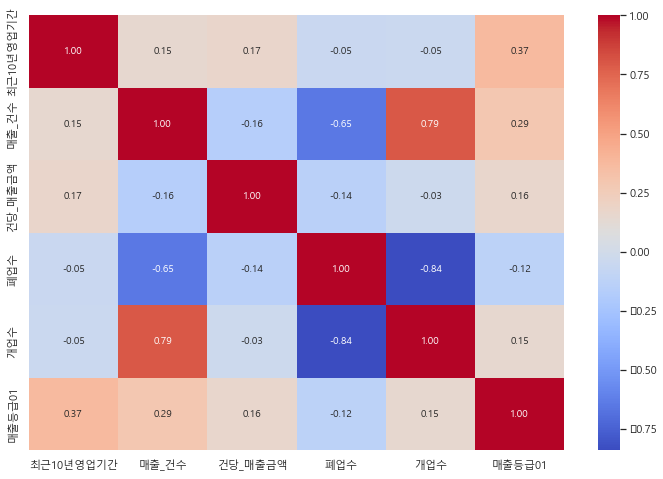

In [211]:
# 상관 행렬 생성
correlation_matrix = combined_df.corr()

# 히트맵으로 상관 행렬 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [212]:
X.describe()

,최근10년영업기간,매출_건수,건당_매출금액,폐업수,개업수
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,2.687000,1.216816e+06,24911.315257,-20.757000,21.547000
std,0.222532,1.843935e+06,13957.155928,27.556221,24.678672
min,2.100000,1.081300e+04,5288.479839,-247.000000,0.000000
25%,2.500000,2.044868e+05,11083.261623,-22.000000,7.000000
50%,2.700000,5.726120e+05,24069.043916,-12.000000,11.000000
75%,2.800000,1.390509e+06,35966.423356,-7.000000,28.000000
max,3.500000,1.494311e+07,63906.503710,0.000000,174.000000


In [213]:
y.value_counts()

0    659
1    341
Name: 매출등급01, dtype: int64

In [214]:
combined_df.corr()

,최근10년영업기간,매출_건수,건당_매출금액,폐업수,개업수,매출등급01
최근10년영업기간,1.000000,0.150820,0.169983,-0.054267,-0.048355,0.371149
매출_건수,0.150820,1.000000,-0.161638,-0.647763,0.792550,0.290599
건당_매출금액,0.169983,-0.161638,1.000000,-0.142473,-0.032195,0.159104
폐업수,-0.054267,-0.647763,-0.142473,1.000000,-0.840949,-0.122918
개업수,-0.048355,0.792550,-0.032195,-0.840949,1.000000,0.146881
매출등급01,0.371149,0.290599,0.159104,-0.122918,0.146881,1.000000


In [215]:
df2=combined_df.corr().reset_index()
df2

,index,최근10년영업기간,매출_건수,건당_매출금액,폐업수,개업수,매출등급01
0,최근10년영업기간,1.000000,0.150820,0.169983,-0.054267,-0.048355,0.371149
1,매출_건수,0.150820,1.000000,-0.161638,-0.647763,0.792550,0.290599
2,건당_매출금액,0.169983,-0.161638,1.000000,-0.142473,-0.032195,0.159104
3,폐업수,-0.054267,-0.647763,-0.142473,1.000000,-0.840949,-0.122918
4,개업수,-0.048355,0.792550,-0.032195,-0.840949,1.000000,0.146881
5,매출등급01,0.371149,0.290599,0.159104,-0.122918,0.146881,1.000000


In [216]:
df2.loc[:,['index','매출등급01']].sort_values(by='매출등급01',ascending=False)

,index,매출등급01
5,매출등급01,1.000000
0,최근10년영업기간,0.371149
1,매출_건수,0.290599
2,건당_매출금액,0.159104
4,개업수,0.146881
3,폐업수,-0.122918


In [217]:
# X['남성_매출_비율']=X['남성_매출_비율']/100
# X['여성_매출_비율']=X['여성_매출_비율']/100
# X.head()

In [218]:
X

,최근10년영업기간,매출_건수,건당_매출금액,폐업수,개업수
0,2.6,1326578,46817.838286,-37,39
1,2.2,3955465,16392.072695,-49,59
2,2.8,1338837,45314.607174,-27,27
3,2.9,2646712,11381.818664,-8,14
4,2.7,631543,51269.617975,-26,6
...,...,...,...,...,...
995,2.2,130946,20285.909780,-2,8
996,2.2,120100,20496.547843,-18,8
997,2.5,1132269,6030.089730,-23,42
998,2.7,231986,18280.180188,-7,7


In [219]:
# from sklearn.preprocessing import MinMaxScaler

# # MinMaxScaler 객체 생성
# scaler = MinMaxScaler()
# # 특성 스케일링 수행
# X = scaler.fit_transform(X)
# X

In [220]:
pd.DataFrame(X).describe()

,최근10년영업기간,매출_건수,건당_매출금액,폐업수,개업수
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,2.687000,1.216816e+06,24911.315257,-20.757000,21.547000
std,0.222532,1.843935e+06,13957.155928,27.556221,24.678672
min,2.100000,1.081300e+04,5288.479839,-247.000000,0.000000
25%,2.500000,2.044868e+05,11083.261623,-22.000000,7.000000
50%,2.700000,5.726120e+05,24069.043916,-12.000000,11.000000
75%,2.800000,1.390509e+06,35966.423356,-7.000000,28.000000
max,3.500000,1.494311e+07,63906.503710,0.000000,174.000000


# 훈련 셋 / 테스트 셋 분할

In [221]:
from sklearn.model_selection import train_test_split

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [222]:
X_train#.shape

,최근10년영업기간,매출_건수,건당_매출금액,폐업수,개업수
29,2.6,1567144,32777.154972,-47,39
535,2.4,189012,24449.665667,-25,19
695,2.6,861915,43382.326522,-29,30
557,2.6,2489286,8475.366997,-43,63
836,2.5,201638,26306.184682,-16,7
...,...,...,...,...,...
106,2.5,99626,19714.411118,-13,5
270,2.2,35797,33708.668184,0,4
860,2.7,138291,25284.588874,-5,11
435,2.6,194119,25151.837239,-6,8


In [223]:
y_train#.shape

29     0
535    0
695    0
557    0
836    0
      ..
106    0
270    0
860    0
435    0
102    0
Name: 매출등급01, Length: 800, dtype: int64

In [224]:
X_test#.shape

,최근10년영업기간,매출_건수,건당_매출금액,폐업수,개업수
521,2.4,542213,10915.965032,-19,20
737,2.8,12325251,7708.093192,-42,52
740,2.5,12341,18883.589904,-4,4
660,2.8,118837,25251.548280,-13,7
411,2.7,895062,11438.658295,-12,22
...,...,...,...,...,...
408,2.7,283025,12350.532161,-6,5
332,2.7,98883,34046.404781,-4,9
208,3.0,710608,15573.784997,-4,5
613,3.0,965308,9233.305771,-9,10


In [225]:
y_test#.shape

521    0
737    1
740    0
660    0
411    0
      ..
408    1
332    0
208    1
613    0
78     1
Name: 매출등급01, Length: 200, dtype: int64

# 정규화(MinMaxScaler)

In [226]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()
# 특성 스케일링 수행
X_scaled = scaler.fit_transform(X_train)
# 테스트 데이터에 스케일링 적용
X_test_scaled = scaler.transform(X_test)

In [227]:
# X_scaled

In [228]:
# X_test_scaled 

# 정규화 값 확인

In [229]:
# # 리스트를 데이터프레임으로 변환
# df2 = pd.DataFrame(X_scaled, columns= selected_features)
# df2

In [230]:
# df2.describe()

@

# 로지스틱회귀(LogisticRegression)

In [231]:
# 최적 하이퍼파라미터: {'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
# 최적 교차 검증 정확도: 0.81875
# {'C': 30, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
#C=30, max_iter=100, penalty='l1', solver='saga'

In [261]:
from sklearn.linear_model import LogisticRegression
# 로지스틱 회귀 모델 생성 및 학습
logreg_model = LogisticRegression(C=20, max_iter=100, penalty='l1', solver='saga',random_state=42)

In [262]:
# X_scaled = X_train
# X_test_scaled = X_test

In [263]:
X_scaled

array([[0.35714286, 0.10422582, 0.46894578, 0.8097166 , 0.24375   ],
       [0.21428571, 0.0119338 , 0.32688215, 0.89878543, 0.11875   ],
       [0.35714286, 0.05699739, 0.64986576, 0.88259109, 0.1875    ],
       ...,
       [0.42857143, 0.00853707, 0.34112561, 0.97975709, 0.06875   ],
       [0.35714286, 0.01227581, 0.33886092, 0.9757085 , 0.05      ],
       [0.35714286, 0.00470396, 0.47871139, 0.96761134, 0.05      ]])

In [264]:
X_test_scaled

array([[2.14285714e-01, 3.55872887e-02, 9.60026426e-02, 9.23076923e-01,
        1.25000000e-01],
       [5.00000000e-01, 8.24684720e-01, 4.12776343e-02, 8.29959514e-01,
        3.25000000e-01],
       [2.85714286e-01, 1.02328523e-04, 2.31927130e-01, 9.83805668e-01,
        2.50000000e-02],
       [5.00000000e-01, 7.23425155e-03, 3.40561949e-01, 9.47368421e-01,
        4.37500000e-02],
       [4.28571429e-01, 5.92172082e-02, 1.04919580e-01, 9.51417004e-01,
        1.37500000e-01],
       [4.28571429e-01, 1.09020996e-01, 8.28374853e-02, 9.10931174e-01,
        8.75000000e-02],
       [4.28571429e-01, 1.51788425e-02, 3.74517701e-01, 9.51417004e-01,
        1.87500000e-02],
       [4.28571429e-01, 8.91913622e-02, 7.96402190e-02, 9.47368421e-01,
        3.75000000e-02],
       [5.00000000e-01, 2.10771711e-01, 4.47319756e-01, 6.76113360e-01,
        4.37500000e-01],
       [3.57142857e-01, 5.32664162e-03, 2.79578948e-01, 9.75708502e-01,
        6.25000000e-02],
       [2.85714286e-01, 1.0064

# 모델 훈련

In [265]:
logreg_model.fit(X_scaled, y_train)

LogisticRegression(C=20, penalty='l1', random_state=42, solver='saga')

In [266]:
y_train

29     0
535    0
695    0
557    0
836    0
      ..
106    0
270    0
860    0
435    0
102    0
Name: 매출등급01, Length: 800, dtype: int64

# 훈련 데이터로 예측

In [267]:
# 훈련 데이터로 예측
y_train_pred = logreg_model.predict(X_scaled)#
y_train_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

# 훈련데이터 예측 정확도

In [268]:
from sklearn.metrics import accuracy_score
# 훈련 세트 정확도 평가
train_accuracy = accuracy_score(y_train, y_train_pred)
print("훈련 세트 정확도:", train_accuracy)

훈련 세트 정확도: 0.77125


# 테스트 데이터로 예측

In [269]:
# 테스트 데이터로 예측
y_pred = logreg_model.predict(X_test_scaled)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0], dtype=int64)

In [270]:
y_pred_proba = logreg_model.predict_proba(X_test_scaled)[:, 1]
y_pred_proba[:20]

array([0.05976488, 0.99991728, 0.11357004, 0.26850023, 0.209291  ,
       0.33250912, 0.26620925, 0.33752942, 0.45803276, 0.15479547,
       0.23926904, 0.27558973, 0.12635455, 0.48099894, 0.10531543,
       0.96944846, 0.0717573 , 0.29570223, 0.11766635, 0.51929001])

# 테스트데이터 예측 정확도

In [271]:
# 테스트 세트 정확도 평가
test_accuracy = accuracy_score(y_test, y_pred)
print("테스트 세트 정확도:", test_accuracy)

테스트 세트 정확도: 0.805


# 모델 성능 평가(정확도,정밀도,재현율,f1스코어,Confusion Matrix)

In [272]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.805
Precision: 0.7111111111111111
Recall: 0.5517241379310345
F1 Score: 0.6213592233009709
Confusion Matrix:
 [[129  13]
 [ 26  32]]


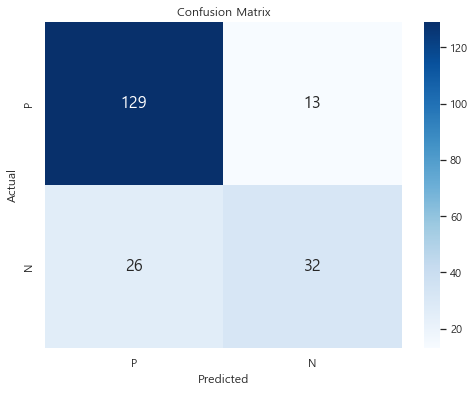

In [273]:
# Confusion Matrix 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# Confusion Matrix 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['P', 'N'], yticklabels=['P', 'N'], annot_kws={'size': 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##### 분류 모델의 여러가지 평가 방법들 (  P : 1 , 매출등급 높음 / N : 0, 매출등급 낮음 )

![confusion matrix](https://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix_files/confusion_matrix_1.png)

- [Confusion Matrix](https://frhyme.github.io/machine-learning/clf_%ED%8F%89%EA%B0%80%ED%95%98%EA%B8%B0/) 기반
    - Accuracy (정확도) : TP+TN / TP+TN+FP+FN (전체 예측 중 올바르게 예측한 비율)
    - Precision (정밀도) : TP / TP+FP (양성으로 예측한 샘플 중 실제로 양성인 샘플의 비율)
    - Recall (재현도) : TP / TP+FN (실제 양성 중 양성으로 올바르게 예측한 샘플의 비율)
    - F1 score : 정밀도와 재현도의 조화 평균값 (정밀도와 재현율 사이의 균형)
    - Specificity 특이도 : TN / TN+FP (주로 음성 클래스를 올바르게 분류하는 능력. 높은 특이도는 모델이 음성 클래스를 잘 분류하고 있는 것)
    - [ROC (Receiver Operating Characteristic) curve](https://angeloyeo.github.io/2020/08/05/ROC.html) : 재현도(민감도)와 특이도를 고려 종합적인 모델 성능(TPR은 높고, FPR이 낮은 경우가 분류가 정확하게 이루어지고 있다는 의미)
    - AUC (Area Under the Curve) : ROC 그래프의 넓이를 계산 성능지표, 1에 가까울수록 좋은 분류 모델

# 로지스틱 회귀 계수 확인
- 각 특성이 예측에 어떤 영향을 미치는지를 나타냅니다. 양수 계수는 해당 특성이 양성 클래스(1)를 예측하는 데 긍정적인 영향을 미치는 것을 의미하며, 음수 계수는 해당 특성이 양성 클래스를 예측하는 데 부정적인 영향을 미치는 것을 나타냅니다.

In [274]:
selected_features

['최근10년영업기간', '매출_건수', '건당_매출금액', '폐업수', '개업수']

In [275]:
log_coef =logreg_model.coef_
log_coef

array([[ 4.31482282, 15.35114126,  2.45059418,  5.36721242, -2.78422487]])

In [276]:
logreg_model.intercept_

array([-9.06820742])

In [277]:
log_coef =logreg_model.coef_[0]
log_coef

array([ 4.31482282, 15.35114126,  2.45059418,  5.36721242, -2.78422487])

In [278]:
# 특성 중요도 정렬을 위해 인덱스 정렬
sorted_indices = np.argsort(log_coef)[::-1]
sorted_indices

array([1, 3, 0, 2, 4], dtype=int64)

@

In [279]:
# 정렬된 순서대로 특성과 중요도 출력
for idx in sorted_indices:
    print(f"{selected_features[idx]}: {log_coef[idx]}")

매출_건수: 15.351141262349312
폐업수: 5.367212416429577
최근10년영업기간: 4.314822815022113
건당_매출금액: 2.4505941822124613
개업수: -2.7842248678366883


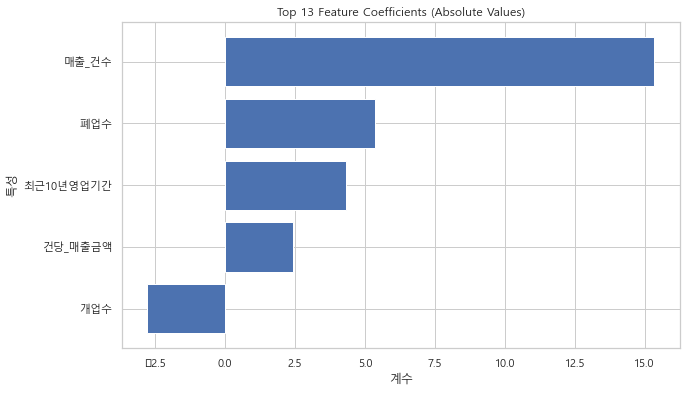

In [280]:
# 상위 N개의 특성 중요도를 선택
top_n = 13
top_features = [selected_features[idx] for idx in sorted_indices][:top_n]
top_coef = [log_coef[idx] for idx in sorted_indices][:top_n]

# 상위 N개의 특성 중요도를 시각화
plt.figure(figsize=(10, 6))
plt.title(f'Top {top_n} Feature Coefficients (Absolute Values)')
plt.barh(top_features, top_coef)
plt.xlabel('계수')
plt.ylabel('특성')
plt.gca().invert_yaxis()  # 상위 특성이 위에 오도록 순서 뒤집기
plt.show()

# 훈련데이터 점수와 테스트데이터 점수의 학습곡선 관찰

In [281]:
# # 학습 데이터와 테스트 데이터의 점수가 벌어지는 과적합에 대한 학습곡선 관찰
# # 학습 데이터 샘플의 개수가 증가함에 따라 학습과 테스트 두 점수가 어떻게 변화하는지 관찰한 그래프
# import scikitplot as skplt
# skplt.estimators.plot_learning_curve(logreg_model, X_scaled, y_train)
# plt.show()

Accuracy: 0.805
Precision: 0.7111111111111111
Recall: 0.5517241379310345
F1 Score: 0.6213592233009709
Confusion Matrix:
 [[129  13]
 [ 26  32]]


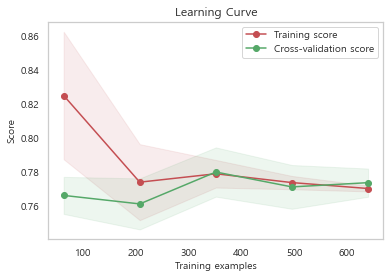

In [282]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# 평가 지표를 계산합니다
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)  # 클래스별 정밀도의 평균
recall = recall_score(y_test, y_pred)  # 클래스별 재현율의 평균
f1 = f1_score(y_test, y_pred)  # 클래스별 F1 스코어의 평균
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

# 학습 데이터와 테스트 데이터의 점수가 벌어지는 과적합에 대한 학습곡선 관찰
# 학습 데이터 샘플의 개수가 증가함에 따라 학습과 테스트 두 점수가 어떻게 변화하는지 관찰한 그래프
import scikitplot as skplt
skplt.estimators.plot_learning_curve(logreg_model, X_scaled, y_train)
plt.show()

# ROC곡선
- ROC 곡선을 그리려면 roc_curve() 함수를 사용하여 FPR(거짓 양성 비율)과 TPR(참 양성 비율) 값을 계산하고, 이를 그래프로 표현합니다.

ROC AUC Score: 0.745264691597863


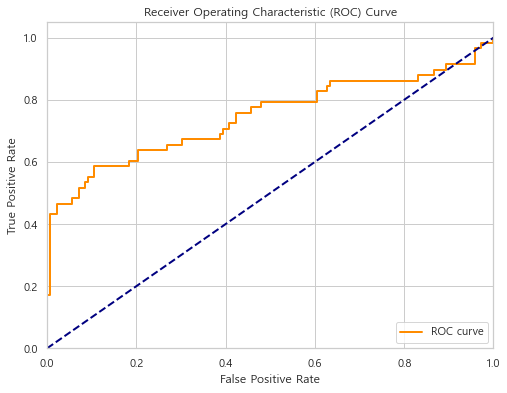

In [283]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# 모델 예측 확률을 사용합니다. 이 예제에서는 가상의 값을 사용하므로 모델 예측 확률을 대체해야 합니다.
#y_scores = [0.2, 0.8, 0.6, 0.7, 0.4, 0.9, 0.3, 0.5, 0.1, 0.7]  # 모델 예측 확률 (0과 1 사이)
#y_true = [0, 1, 1, 1, 0, 1, 0, 1, 0, 0]  # 실제 클래스 (0 또는 1)

# ROC 곡선을 계산합니다.
#fpr, tpr, thresholds = roc_curve(y_true, y_scores)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# ROC 곡선을 그립니다.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# ROC AUC 값을 계산합니다.
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

plt.show()

# Precision-Recall 곡선
- Precision (정밀도) : TP / TP+FP (양성으로 예측한 샘플 중 실제로 양성인 샘플의 비율)
- Recall (재현도) : TP / TP+FN (실제 양성 중 양성으로 올바르게 예측한 샘플의 비율)
- Precision-Recall 곡선은 모델의 성능을 Precision과 Recall 간의 트레이드오프 관계로 시각화합니다. 이 곡선을 통해 모델이 어느 임계값에서 어떻게 동작하는지에 대한 통찰을 얻을 수 있습니다.

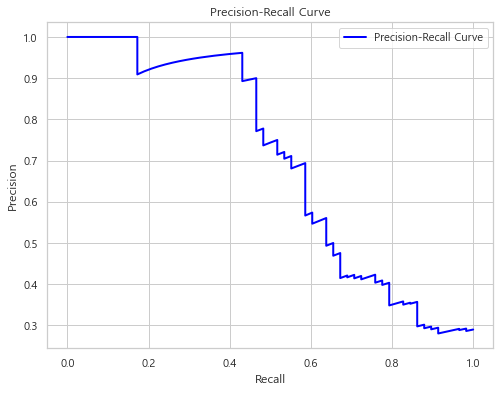

In [284]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve


# Precision-Recall 곡선을 계산합니다.
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Precision-Recall 곡선을 그립니다.
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

정밀도(Precision) 증가, 재현율(Recall) 감소:

모델이 양성으로 예측하는 기준(임계값)을 높일 때 정밀도는 증가하고, 재현율은 감소합니다.
이 경우, 모델은 양성 클래스로 예측하는 샘플을 더 신중하게 선택하며, 거짓 양성(FP)을 줄이려고 합니다. 그 결과 양성으로 예측한 샘플 중 정확한 양성(TP) 비율이 높아지지만, 재현율이 감소하게 됩니다.  
  
정밀도 감소, 재현율 증가:

모델이 양성으로 예측하는 기준(임계값)을 낮출 때 정밀도는 감소하고, 재현율은 증가합니다.
이 경우, 모델은 양성 클래스로 예측하는 샘플을 더 많이 선택하며, 실제 양성 중에서 더 많은 것을 양성으로 예측합니다. 그 결과 재현율이 증가하지만, 정밀도가 감소하게 됩니다.
따라서 정밀도-재현율 곡선이 반비례로 그려지면 모델이 어떤 기준을 선택하느냐에 따라 정밀도와 재현율 사이의 균형을 조절할 수 있음을 나타냅니다. 모델의 목적과 상황에 따라 이 균형을 조절하여 최적의 성능을 얻을 수 있습니다.

# 교차검증

In [285]:
from sklearn.model_selection import cross_val_score

# 교차 검증을 수행하며 정확도를 평가
cv_scores = cross_val_score(logreg_model, X_scaled, y_train, cv=5, scoring='accuracy')

# 교차 검증 정확도 평균 및 표준편차 계산
mean_cv_accuracy = cv_scores.mean()
std_cv_accuracy = cv_scores.std()

print("교차 검증 정확도 평균:", mean_cv_accuracy)
print("교차 검증 정확도 표준편차:", std_cv_accuracy)

교차 검증 정확도 평균: 0.7737499999999999
교차 검증 정확도 표준편차: 0.0082915619758885


In [286]:
cv_scores

array([0.7875 , 0.76875, 0.775  , 0.7625 , 0.775  ])

교차 검증 정확도 평균 (Cross-Validation Accuracy Mean): 0.8116

모든 교차 검증 폴드에서 얻은 정확도의 평균값입니다.
이 값은 모델의 전반적인 성능을 나타냅니다. 높은 평균 정확도는 모델이 데이터를 잘 분류하고 있는 것을 의미합니다.

교차 검증 정확도 표준 편차 (Cross-Validation Accuracy Standard Deviation): 0.0035

교차 검증을 수행할 때 각 폴드에서 얻은 정확도의 변동성을 나타내는 지표입니다.
표준 편차가 낮을수록 교차 검증 폴드 간의 정확도 차이가 작고 일관된 모델 성능을 나타냅니다. 높은 표준 편차는 모델이 다양한 데이터 폴드에서 성능이 크게 변하는 것을 나타냅니다.
따라서 주어진 결과에서는 모델의 평균 정확도가 약 0.8116으로 상당히 높은 성능을 나타내고 있으며, 정확도의 표준 편차가 약 0.0035로 변동이 작은 것으로 나타납니다. 이는 모델이 안정적이며, 교차 검증에서 일관된 성능을 보이고 있다는 것을 의미합니다.

표준편차가 작을수록 각 폴드의 정확도가 평균 정확도와 비슷하게 유지되고 있다는 의미입니다.

# 그리드서치

In [260]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 20, 30, 40, 50],
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 150, 200, 250, 300]
}

grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y_train)

best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("최적 하이퍼파라미터:", best_params)
print("최적 교차 검증 정확도:", best_accuracy)

최적 하이퍼파라미터: {'C': 20, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
최적 교차 검증 정확도: 0.7737499999999999


로지스틱 회귀 모델의 하이퍼파라미터 조정을 위해 Grid Search를 사용합니다. 주어진 결과와 특성 중요도를 고려하여 다양한 하이퍼파라미터 조합을 시도해보고 최적의 모델을 찾을 수 있습니다. 아래는 가능한 하이퍼파라미터 튜닝 값들과 추천하는 범위입니다.

1. **C (규제 강도)**:
   - C 값은 규제의 강도를 조절하는데, 현재 값은 1로 설정되어 있습니다. 보다 강한 규제를 원한다면 작은 값 (예: 0.1)을 시도하고, 더 약한 규제를 원한다면 큰 값 (예: 10)을 시도할 수 있습니다.

2. **solver (최적화 알고리즘)**:
   - 현재 solver는 기본값인 'lbfgs'로 설정되어 있습니다. 다른 solver 값을 시도해보고 성능을 평가할 수 있습니다. 'liblinear', 'newton-cg', 'sag', 'saga' 등을 시도해보세요.

3. **penalty (규제 유형)**:
   - 'l1' 또는 'l2' 규제 중 어떤 것을 사용할지 시도해보세요. 데이터와 모델에 따라 다른 규제 유형이 더 적합할 수 있습니다.

4. **max_iter (최대 반복 횟수)**:
   - 최적화 알고리즘이 수렴하지 않는 경우, max_iter 값을 늘려보세요. 현재 값은 100으로 설정되어 있습니다.

# 결정트리(DecisionTreeClassifier)

In [105]:
## 특성 선택
selected_features

['최근10년영업기간', '매출_건수', '건당_매출금액', '폐업수', '개업수']

In [106]:
X = df[selected_features]
y = df['매출등급01']

In [107]:
## 훈련데이터, 테스트데이터 나눠주기
from sklearn.model_selection import train_test_split
# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
#criterion = 'entropy', max_depth = 7, min_samples_split =21,min_impurity_decrease = 0.0004
from sklearn.tree import DecisionTreeClassifier

# 결정 트리 분류 모델 생성
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7, min_samples_split =21,min_impurity_decrease = 0.0004)#(criterion = 'entropy', max_depth = 7, min_samples_split =21,min_impurity_decrease = 0.0004)

In [109]:
# #정규화적용
# X_train=X_scaled
# X_test=X_test_scaled

In [110]:
# 모델 학습
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7,
                       min_impurity_decrease=0.0004, min_samples_split=21)

# 훈련셋 정확도

In [111]:
# 훈련 세트에 대한 예측
y_train_pred = dt_model.predict(X_train)
y_train_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [112]:
# 훈련 세트 정확도 평가
train_accuracy = accuracy_score(y_train, y_train_pred)
print("훈련 세트 정확도:", train_accuracy)

훈련 세트 정확도: 0.90375


# 테스트셋 정확도

In [113]:
# 테스트 세트에 대한 예측
y_pred = dt_model.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0], dtype=int64)

In [114]:
# 테스트 세트 정확도 평가
test_accuracy = accuracy_score(y_test, y_pred)
print("테스트 세트 정확도:", test_accuracy)

테스트 세트 정확도: 0.86


# 모델 평가

Accuracy: 0.86
Precision: 0.7073170731707317
Recall: 0.6444444444444445
F1 Score: 0.6744186046511628
Confusion Matrix:
 [[143  12]
 [ 16  29]]


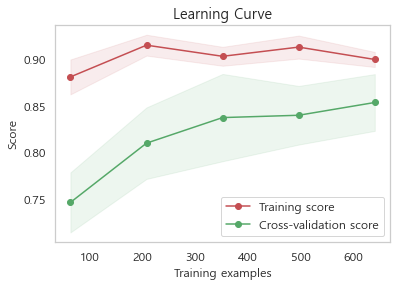

In [115]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# 평가 지표를 계산합니다
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)  # 클래스별 정밀도의 평균
recall = recall_score(y_test, y_pred)  # 클래스별 재현율의 평균
f1 = f1_score(y_test, y_pred)  # 클래스별 F1 스코어의 평균
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

# 학습 데이터와 테스트 데이터의 점수가 벌어지는 과적합에 대한 학습곡선 관찰
# 학습 데이터 샘플의 개수가 증가함에 따라 학습과 테스트 두 점수가 어떻게 변화하는지 관찰한 그래프
import scikitplot as skplt
skplt.estimators.plot_learning_curve(dt_model, X_train, y_train)
plt.show()

# 교차 검증
- 모델의 안정성과 일반화 능력 확인

In [116]:
from sklearn.model_selection import cross_val_score

# 교차 검증을 수행하며 정확도를 평가
cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')

# 교차 검증 정확도 평균 및 표준편차 계산
mean_cv_accuracy = cv_scores.mean()
std_cv_accuracy = cv_scores.std()

print("교차 검증 정확도 평균:", mean_cv_accuracy)
print("교차 검증 정확도 표준편차:", std_cv_accuracy)

교차 검증 정확도 평균: 0.8525
교차 검증 정확도 표준편차: 0.02920830361386983


# 특성중요도

In [117]:
selected_features

['최근10년영업기간', '매출_건수', '건당_매출금액', '폐업수', '개업수']

In [118]:
feature_importances = dt_model.feature_importances_
feature_importances

array([0.29476137, 0.25707717, 0.27345228, 0.02585387, 0.14885531])

최근10년영업기간: 0.2947613678079969
건당_매출금액: 0.2734522775848348
매출_건수: 0.257077174696235
개업수: 0.14885531033025004
폐업수: 0.02585386958068313


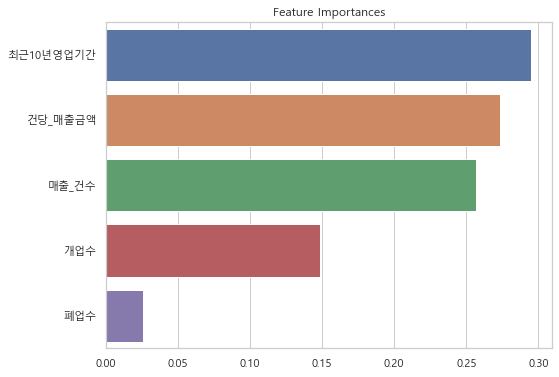

In [119]:
# 특성 중요도 정렬을 위해 인덱스 정렬
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_indices

# 정렬된 순서대로 특성과 중요도 출력
for idx in sorted_indices:
    print(f"{selected_features[idx]}: {feature_importances[idx]}")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = dt_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [120]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 dtree.dot 파일을 생성함. 
export_graphviz(dt_model, out_file="dtree.dot", impurity=True, filled=True)

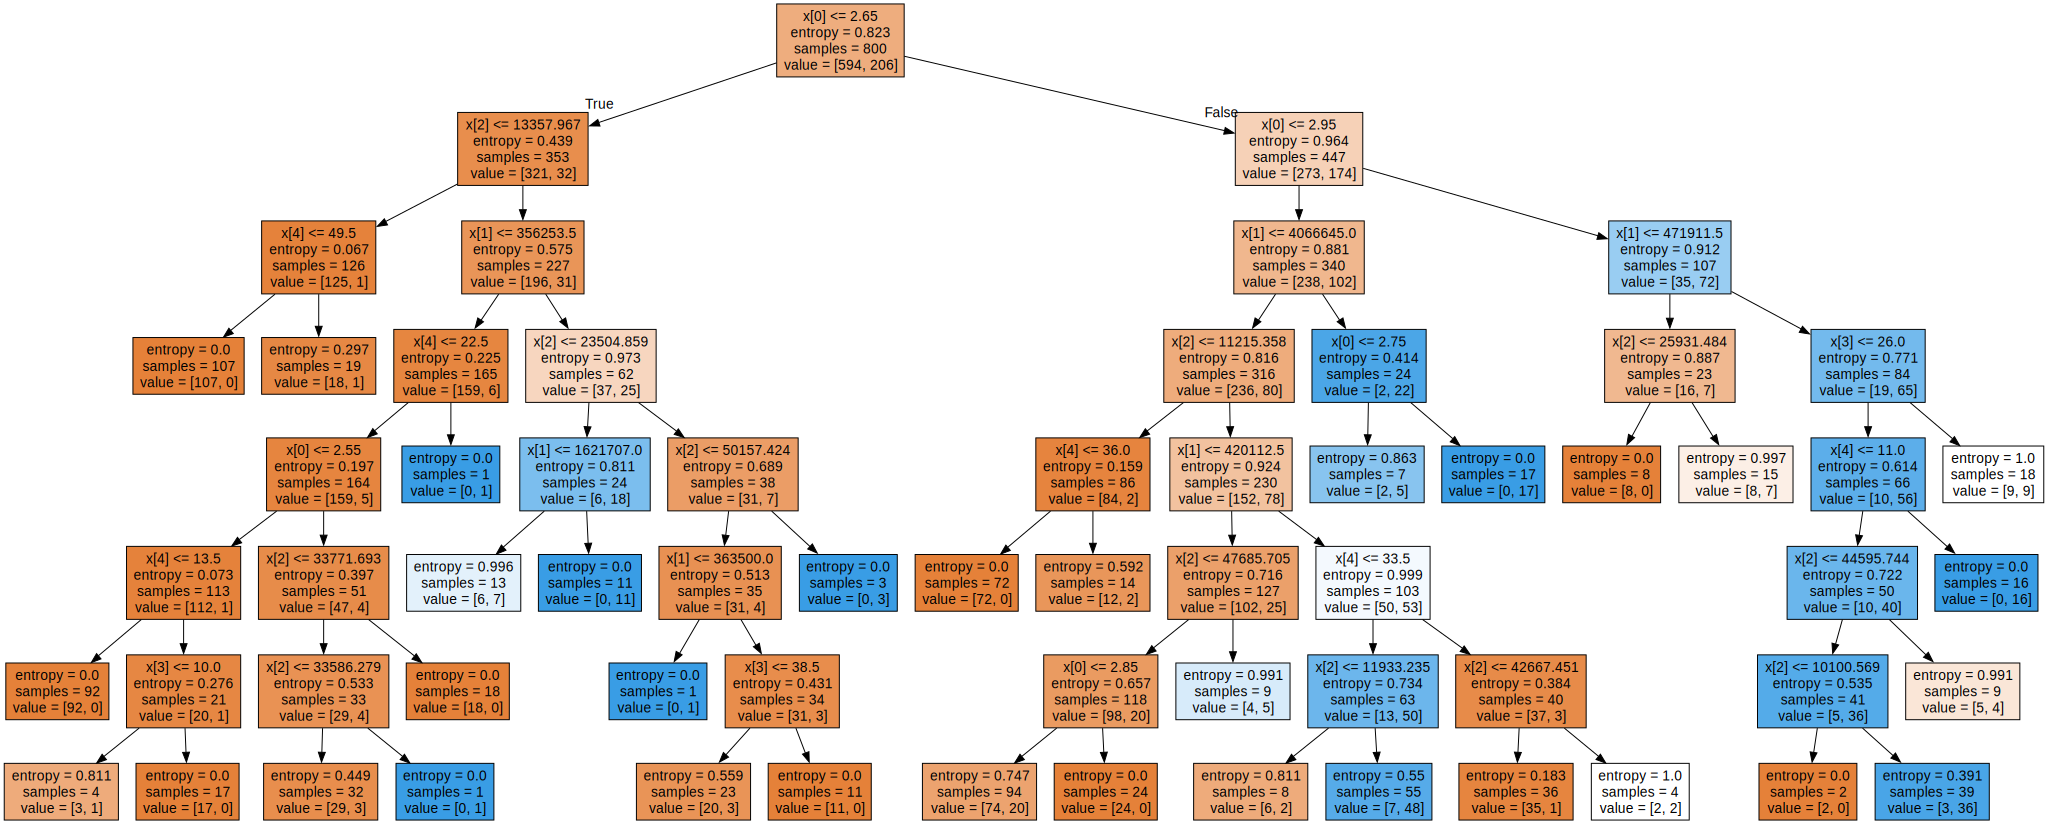

In [121]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("dtree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# 그리드서치 (최적의 하이퍼파라미터 선택)

In [122]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# 그리드 서치에서 탐색할 하이퍼파라미터 후보값들 설정
param_grid = {
#     'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
    'max_depth': range(1, 20,1),
#     'min_samples_split': range(1, 100,10),
#     'criterion': ['gini', 'entropy']
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, 
                           cv=5, scoring='accuracy',n_jobs=-1)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터와 그 때의 최고 정확도 출력
print("최적 하이퍼파라미터:", grid_search.best_params_)
print("최고 정확도:", grid_search.best_score_)

최적 하이퍼파라미터: {'max_depth': 7}
최고 정확도: 0.8549999999999999


In [123]:
# from sklearn.tree import plot_tree
# import matplotlib.pyplot as plt

# plt.figure(figsize=(20,15))
# plot_tree(dt_model, filled=True, feature_names= selected_features ) # feature_names = 특성 리스트
# plt.show()

In [124]:
#!pip install graphviz

##### 장점
- 결정 트리의 쉽고 직관적인 장점을 그대로 가지고 있음
- 앙상블 알고리즘 중 비교적 빠른 수행 속도를 가지고 있음
- 다양한 분야에서 좋은 성능을 나타냄

##### 단점
- 하이퍼 파라미터가 많아 튜닝을 위힌 시간이 많이 소요됨

# 랜덤포레스트(Random Forest)

Decision Tree에서 tree가 여러개인 것이 forest로, 위에 언급한 것처럼 Decision Tree는 기존의 데이터를 분류하는 것이기 때문에 overfitting이 일어나기 쉽습니다. 이를 완화하는 방법이 Radom Forest  

랜덤 포레스트는 많은 결정트리를 평균화하므로 과적합을 줄이는 효과가 있습니다. 각 트리가 부트스트랩 샘플링을 통해 다양한 데이터로 훈련되기 때문에 다양성이 확보되어 과적합을 완화합니다.  

다양한 결정트리의 예측을 결합하므로 일반화 능력이 높아지며, 복잡한 데이터에서도 상대적으로 안정적인 성능을 보입니다.   

결정트리: 작은 데이터셋에서는 계산 비용이 낮지만, 깊은 트리로 확장되면 복잡한 모델이 되어 계산 비용이 증가합니다.  

랜덤 포레스트: 여러 개의 트리를 병렬로 처리하기 때문에 계산 비용이 더 높을 수 있지만, 트리가 여러 개라도 각 트리의 깊이를 얕게 유지하기 때문에 전체적인 계산 비용은 제어될 수 있습니다.  

랜덤 포레스트는 결정트리의 단점인 과적합을 완화하고 예측 성능을 향상시키는데 사용되는 강력한 알고리즘입니다. 하지만 하이퍼파라미터 튜닝과 모델 해석 등에서 더 복잡한 접근이 필요할 수 있습니다.  

In [125]:
## 특성 선택
selected_features

['최근10년영업기간', '매출_건수', '건당_매출금액', '폐업수', '개업수']

In [126]:
X = df[selected_features]
y = df['매출등급01']

# 훈련/테스트 데이터 분할

In [127]:
## 훈련데이터, 테스트데이터 나눠주기
from sklearn.model_selection import train_test_split
# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤포레스트 모델 생성 및 학습

In [128]:
# Best Parameters: {'criterion': 'entropy', 'max_depth': 17, 'n_estimators': 70}
# Best Score: 0.9
# Test Accuracy of the Best Model: 0.925

In [129]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤포레스트 모델 생성 및 학습
rf_model = RandomForestClassifier(criterion='entropy', n_estimators=90, max_depth=29, n_jobs=-1)# min_samples_split= 9, 
rf_model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=29, n_estimators=90,
                       n_jobs=-1)

# 훈련셋 정확도

In [130]:
# 훈련 세트에 대한 예측
y_train_pred = rf_model.predict(X_train)
y_train_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [131]:
# 훈련 세트 정확도 평가
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"랜덤포레스트 훈련세트 정확도: {train_accuracy}")

랜덤포레스트 훈련세트 정확도: 0.99875


# 테스트 셋 정확도

In [132]:
# 테스트 데이터로 예측
y_pred= rf_model.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0], dtype=int64)

In [133]:
# 테스트 세트 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"랜덤포레스트 테스트세트 정확도: {accuracy}")

랜덤포레스트 테스트세트 정확도: 0.925


# 모델 평가 지표

In [134]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# 평가 지표를 계산합니다
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)  # 클래스별 정밀도의 평균
recall = recall_score(y_test, y_pred)  # 클래스별 재현율의 평균
f1 = f1_score(y_test, y_pred)  # 클래스별 F1 스코어의 평균
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.925
Precision: 0.8571428571428571
Recall: 0.8
F1 Score: 0.8275862068965518
Confusion Matrix:
 [[149   6]
 [  9  36]]


In [135]:
# # 학습 데이터와 테스트 데이터의 점수가 벌어지는 과적합에 대한 학습곡선 관찰
# # 학습 데이터 샘플의 개수가 증가함에 따라 학습과 테스트 두 점수가 어떻게 변화하는지 관찰한 그래프
# import scikitplot as skplt
# skplt.estimators.plot_learning_curve(rf_model, X_train, y_train)
# plt.show()

# 특성중요도

In [136]:
selected_features

['최근10년영업기간', '매출_건수', '건당_매출금액', '폐업수', '개업수']

In [137]:
feature_importances = rf_model.feature_importances_
feature_importances

array([0.21252148, 0.27646184, 0.26561972, 0.11397551, 0.13142145])

In [138]:
# 특성 중요도 정렬을 위해 인덱스 정렬
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_indices

# 정렬된 순서대로 특성과 중요도 출력
for idx in sorted_indices:
    print(f"{selected_features[idx]}: {feature_importances[idx]}")

매출_건수: 0.27646184258512474
건당_매출금액: 0.26561971593524897
최근10년영업기간: 0.21252148333665333
개업수: 0.131421448122635
폐업수: 0.11397551002033807


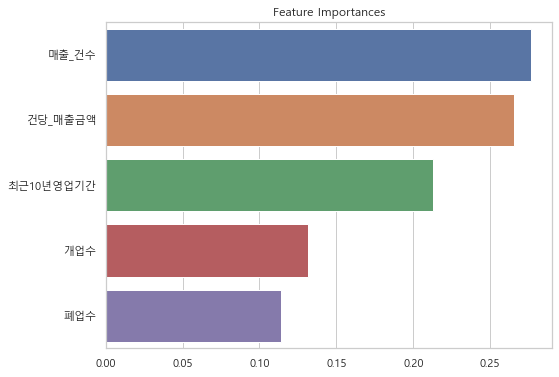

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

# 그리드 서치

In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

@

In [141]:
# 그리드 서치에 사용할 하이퍼파라미터 후보값들
param_grid = {
    'n_estimators': range(10, 100, 10),
    'max_depth': range(10, 30, 1),
#     'min_samples_split': range(2, 10, 1),
#      'min_samples_leaf': range(1, 10, 1),
#      'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# 그리드 서치 수행
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 조합과 평가 점수 출력
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# 최적 모델 평가
best_rf_model = grid_search.best_estimator_
test_accuracy = best_rf_model.score(X_test, y_test)
print("Test Accuracy of the Best Model:", test_accuracy)

Best Parameters: {'criterion': 'entropy', 'max_depth': 18, 'n_estimators': 70}
Best Score: 0.9
Test Accuracy of the Best Model: 0.925


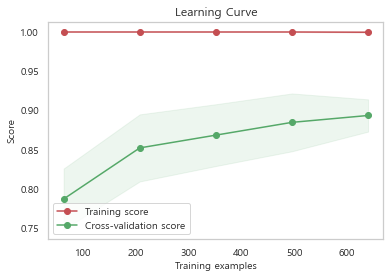

In [142]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(rf_model, X_train, y_train)
plt.show()

# XGBClassifier

In [143]:
# !pip install xgboost

In [144]:
import xgboost as xgb

In [145]:
# 최적 하이퍼파라미터: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
# 최적 교차 검증 정확도: 0.8887499999999999

In [146]:
xgb_model = xgb.XGBClassifier(learning_rate=0.1,max_depth=5, n_estimators=100, subsample=0.8, random_state=42)

In [147]:
# 모델 학습
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [148]:
# 훈련 세트에 대한 예측
y_train_pred = xgb_model.predict(X_train)

In [149]:
# 훈련 세트 정확도 평가
train_accuracy = accuracy_score(y_train, y_train_pred)
print("훈련 세트 정확도:", train_accuracy)

훈련 세트 정확도: 0.97375


In [150]:
# 테스트 세트에 대한 예측
y_test_pred = xgb_model.predict(X_test)

In [151]:
# 테스트 세트 정확도 평가
test_accuracy = accuracy_score(y_test, y_test_pred)
print("테스트 세트 정확도:", test_accuracy)

테스트 세트 정확도: 0.925


# 모델 평가 지표

In [152]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# 평가 지표를 계산합니다
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)  # 클래스별 정밀도의 평균
recall = recall_score(y_test, y_test_pred)  # 클래스별 재현율의 평균
f1 = f1_score(y_test, y_test_pred)  # 클래스별 F1 스코어의 평균
conf_matrix = confusion_matrix(y_test, y_test_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.925
Precision: 0.8571428571428571
Recall: 0.8
F1 Score: 0.8275862068965518
Confusion Matrix:
 [[149   6]
 [  9  36]]


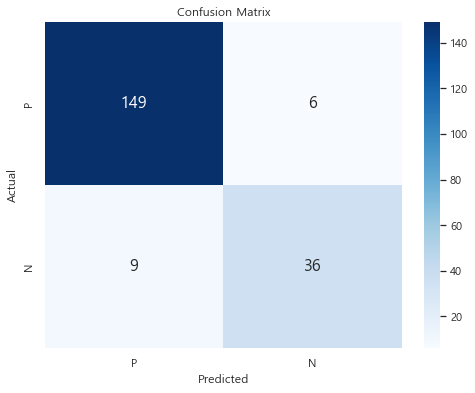

In [153]:
# Confusion Matrix 계산
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Confusion Matrix 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['P', 'N'], yticklabels=['P', 'N'], annot_kws={'size': 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 특성중요도 확인

In [154]:
feature_importances = xgb_model.feature_importances_
feature_importances

array([0.33399624, 0.22060928, 0.17376417, 0.13431188, 0.13731848],
      dtype=float32)

In [155]:
for feature_name, importance in zip(selected_features, feature_importances):
    print(f"{feature_name} : {importance}")

최근10년영업기간 : 0.3339962363243103
매출_건수 : 0.22060927748680115
건당_매출금액 : 0.173764169216156
폐업수 : 0.13431188464164734
개업수 : 0.1373184770345688


최근10년영업기간: 0.3339962363243103
매출_건수: 0.22060927748680115
건당_매출금액: 0.173764169216156
개업수: 0.1373184770345688
폐업수: 0.13431188464164734


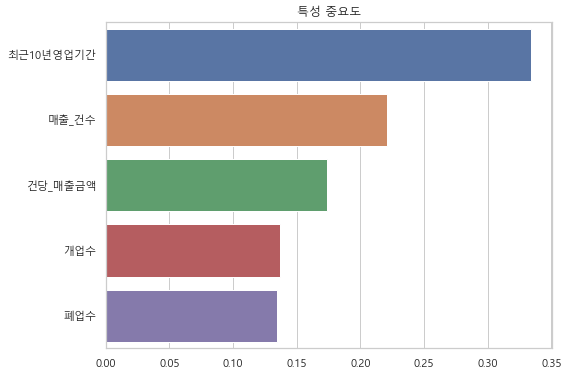

In [156]:
# 특성 중요도 정렬을 위해 인덱스 정렬
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_indices

# 정렬된 순서대로 특성과 중요도 출력
for idx in sorted_indices:
    print(f"{selected_features[idx]}: {feature_importances[idx]}")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = xgb_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('특성 중요도')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

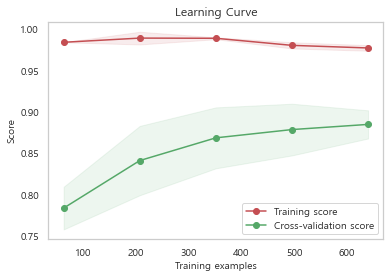

In [157]:
# 학습 데이터와 테스트 데이터의 점수가 벌어지는 과적합에 대한 학습곡선 관찰
# 학습 데이터 샘플의 개수가 증가함에 따라 학습과 테스트 두 점수가 어떻게 변화하는지 관찰한 그래프
import scikitplot as skplt
skplt.estimators.plot_learning_curve(xgb_model, X_train, y_train)
plt.show()

In [158]:
from sklearn.model_selection import GridSearchCV

# 탐색할 하이퍼파라미터 그리드 설정
param_grid = {
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

# Grid Search 실행
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 및 정확도 출력
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print("최적 하이퍼파라미터:", best_params)
print("최적 교차 검증 정확도:", best_accuracy)

최적 하이퍼파라미터: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.9}
최적 교차 검증 정확도: 0.8949999999999999


# LGBMClassifier

In [159]:
# !pip install lightgb

In [160]:
import lightgbm as lgbm

In [161]:
# LightGBM 분류 모델 생성
lgbm_model = lgbm.LGBMClassifier(random_state=42)

In [162]:
# 모델 학습
lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 206, number of negative: 594
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000094 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.257500 -> initscore=-1.059003
[LightGBM] [Info] Start training from score -1.059003
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(random_state=42)

In [163]:
# 훈련 세트에 대한 예측
y_train_pred = lgbm_model.predict(X_train)
y_train_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [164]:
# 훈련 세트 정확도 평가
train_accuracy = accuracy_score(y_train, y_train_pred)
print("훈련 세트 정확도:", train_accuracy)

훈련 세트 정확도: 1.0


In [165]:
# 테스트 세트에 대한 예측
y_test_pred = lgbm_model.predict(X_test)
y_test_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0], dtype=int64)

In [166]:
# 테스트 세트 정확도 평가
test_accuracy = accuracy_score(y_test, y_test_pred)
print("테스트 세트 정확도:", test_accuracy)

테스트 세트 정확도: 0.935


# 모델 평가 지표

In [167]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# 평가 지표를 계산합니다
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)  # 클래스별 정밀도의 평균
recall = recall_score(y_test, y_test_pred)  # 클래스별 재현율의 평균
f1 = f1_score(y_test, y_test_pred)  # 클래스별 F1 스코어의 평균
conf_matrix = confusion_matrix(y_test, y_test_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.935
Precision: 0.8809523809523809
Recall: 0.8222222222222222
F1 Score: 0.8505747126436781
Confusion Matrix:
 [[150   5]
 [  8  37]]


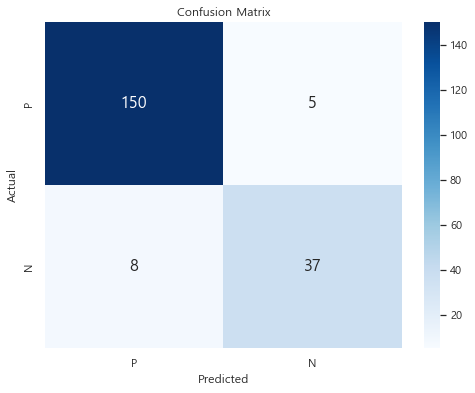

In [168]:
# Confusion Matrix 계산
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Confusion Matrix 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['P', 'N'], yticklabels=['P', 'N'], annot_kws={'size': 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 학습곡선 관찰

[LightGBM] [Info] Number of positive: 17, number of negative: 47
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 91
[LightGBM] [Info] Number of data points in the train set: 64, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265625 -> initscore=-1.016934
[LightGBM] [Info] Start training from score -1.016934
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 165, number of negative: 475
[LightGBM] [Warning] Auto-choosin

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 453
[LightGBM] [Info] Number of data points in the train set: 496, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.243952 -> initscore=-1.131135
[LightGBM] [Info] Start training from score -1.131135
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

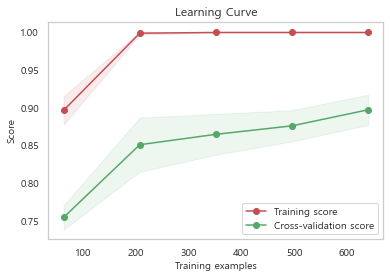

In [169]:
# 학습 데이터와 테스트 데이터의 점수가 벌어지는 과적합에 대한 학습곡선 관찰
# 학습 데이터 샘플의 개수가 증가함에 따라 학습과 테스트 두 점수가 어떻게 변화하는지 관찰한 그래프
import scikitplot as skplt
skplt.estimators.plot_learning_curve(lgbm_model, X_train, y_train)
plt.show()

# 특성중요도 확인

In [170]:
feature_importances = lgbm_model.feature_importances_
feature_importances

array([ 338,  942, 1006,  347,  361])

In [171]:
for feature_name, importance in zip(selected_features, feature_importances):
    print(f"{feature_name} : {importance}")

최근10년영업기간 : 338
매출_건수 : 942
건당_매출금액 : 1006
폐업수 : 347
개업수 : 361


건당_매출금액: 1006
매출_건수: 942
개업수: 361
폐업수: 347
최근10년영업기간: 338


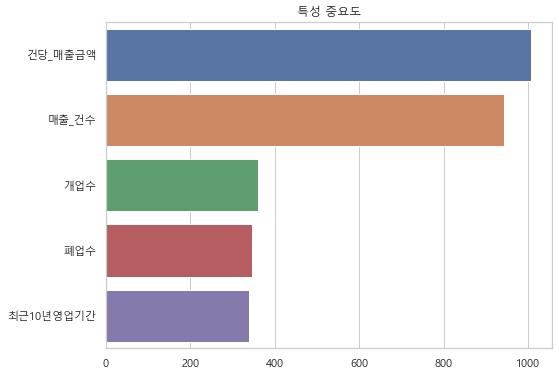

In [172]:
# 특성 중요도 정렬을 위해 인덱스 정렬
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_indices

# 정렬된 순서대로 특성과 중요도 출력
for idx in sorted_indices:
    print(f"{selected_features[idx]}: {feature_importances[idx]}")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = lgbm_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('특성 중요도')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

위 결과에서 알 수 있는 것은 XGBoost와 LightGBM이 다른 모델에 비해 더 높은 교차 검증 정확도를 가지며,   
특히 LightGBM이 가장 높은 정확도를 나타내고 있습니다.  
이러한 결과를 토대로 XGBoost나 LightGBM과 같은 
부스팅 알고리즘을 사용하는 것이 모델 성능 향상에 도움이 될 수 있습니다.     

교차 검증은 머신 러닝 모델의 성능을 평가하고 일반화 능력을 추정하기 위한 기술입니다.   
모델의 성능을 평가하기 위해 주어진 데이터를 여러 개의 부분으로 나눈 후,   
그 부분 중 하나를 검증 세트로 사용하고 나머지 부분을 훈련 세트로 사용하여 모델을 학습합니다.   
이 과정을 여러 번 반복하여 각각의 검증 세트에 대한 성능을 평가하고 이를 평균하여 모델의 성능을 측정합니다.  
  
일반적으로 k-폴드 교차 검증을 사용합니다.  
1. 데이터 분할: 주어진 데이터를 먼저 훈련 데이터와 테스트 데이터로 나눕니다.   
그 후, 훈련 데이터를 k개의 부분으로 분할합니다.  
2. 모델 학습 및 평가: 각각의 부분을 한 번씩 검증 세트로 사용하고   
나머지 k-1개 부분을 훈련 세트로 사용하여 모델을 학습합니다.   
이렇게 학습된 모델을 검증 세트로 평가하여 성능 지표를 계산합니다.  
3. 과정 반복: 위 과정을 k번 반복하면서 각 검증 세트에 대한 성능을 평가합니다.  
4. 성능 평균 계산: k번의 평가 결과를 평균하여 모델의 최종 성능을 추정합니다.  

교차 검증의 장점  
- **더 정확한 성능 평가**: 단일 테스트 데이터에 의존하는 것보다 더 일반화된 모델 성능 평가를 제공합니다.  
- **과적합 검증**: 모델의 과적합을 평가하고 모델이 새로운 데이터에 얼마나 잘 적응될 수 있는지 알 수 있습니다.  
- **데이터 활용도 증가**: 모든 데이터를 훈련 및 테스트에 활용할 수 있어서 데이터의 효율적인 활용을 가능하게 합니다.  
하지만 교차 검증은 연산 비용이 상대적으로 높아질 수 있고, 데이터 양이 많을 경우 시간이 오래 걸릴 수 있습니다.   
또한 모델마다 최적의 하이퍼파라미터 조합을 찾기 위해 교차 검증을 여러 번 수행해야 할 수 있습니다.  

# 앙상블

In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# 각 모델 생성
logreg_model = LogisticRegression()
knn_model = KNeighborsClassifier()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
lgbm_model = LGBMClassifier(n_estimators=100, random_state=42)

In [174]:
# 보팅 앙상블 모델 생성
voting_model = VotingClassifier(estimators=[
    ('logreg', logreg_model),
    ('knn', knn_model),
    ('dt', dt_model),
    ('rf', rf_model),
    ('xgb', xgb_model),
    ('lgbm', lgbm_model)
], voting='hard')

In [175]:
# 앙상블 모델 학습
voting_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 206, number of negative: 594
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000084 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.257500 -> initscore=-1.059003
[LightGBM] [Info] Start training from score -1.059003
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


VotingClassifier(estimators=[('logreg', LogisticRegression()),
                             ('knn', KNeighborsClassifier()),
                             ('dt', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=F...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=42, ...)),
                             ('lgbm', LGBMClassifier(random_state=42))])

In [176]:
# 앙상블 모델 예측
ensemble_predictions = voting_model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, ensemble_predictions)
print("앙상블 모델 정확도:", accuracy)

앙상블 모델 정확도: 0.925


In [177]:
# 훈련 데이터에 대한 정확도 평가
train_predictions = voting_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("훈련 데이터 정확도:", train_accuracy)

# 테스트 데이터에 대한 정확도 평가
test_predictions = voting_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("테스트 데이터 정확도:", test_accuracy)

훈련 데이터 정확도: 1.0
테스트 데이터 정확도: 0.925


# KNN(K-Nearest Neighbors)

K-Nearest Neighbors (KNN) 모델을 적용하는 것이 적절한지를 결정하기 위해서는 데이터의 특성과 문제의 성격을 고려해야 합니다. 주어진 상황에서 KNN 모델을 적용하는 것이 적절한지 여부를 판단하기 위해 아래의 요소를 고려해보세요:

1. **데이터의 특성:**
   - KNN은 샘플 간의 거리를 기반으로 예측을 수행합니다. 따라서 데이터의 특성들이 거리 개념에 잘 맞아야 합니다. 선택한 특성들이 거리 계산에 적합한지 고려해야 합니다.

2. **데이터의 크기:**
   - KNN은 모든 데이터 포인트 간의 거리를 계산하므로, 데이터셋이 큰 경우에는 연산 비용이 크게 증가할 수 있습니다.

3. **특성의 스케일:**
   - KNN은 특성 간의 거리를 기반으로 예측하기 때문에, 특성들의 스케일이 동등하게 조절되어야 합니다. 스케일이 크게 다른 경우에는 스케일링 과정이 필요합니다.

4. **클래스의 불균형:**
   - 데이터셋의 클래스 분포가 불균형한 경우, KNN은 적은 클래스에 치우친 결과를 가져올 수 있습니다.

5. **K의 선택:**
   - KNN 모델에서 K 값을 어떻게 선택하느냐에 따라 결과가 크게 달라질 수 있습니다. 적절한 K 값을 선택하는 과정이 필요합니다.

상기 요소들을 고려하여 데이터와 문제의 특성에 따라 KNN 모델을 적용하는 것이 적절한지 판단해야 합니다. KNN 외에도 다양한 머신 러닝 모델들이 존재하므로, 문제에 가장 적합한 모델을 선택하는 것이 중요합니다. 이를 위해 교차 검증이나 모델 선택 기법을 활용하여 여러 모델을 비교하고 평가하는 것이 좋습니다.

머신 러닝 모델을 학습할 때, 특성들의 크기가 다르거나 범위가 큰 경우에는 모델의 학습 및 예측 성능에 영향을 줄 수 있습니다. 이런 경우에는 특성 스케일링(Feature Scaling)을 적용하여 모든 특성을 동일한 범위 내에 두는 것이 좋습니다. 여러 가지 스케일링 방법이 있지만 대표적인 두 가지 방법을 설명하고, 적절한 스케일링 방법을 추천해드리겠습니다.

### 1. 표준화 (Standardization):
표준화는 각 특성의 평균을 0으로, 표준편차를 1로 만들어주는 스케일링 방법입니다. 표준화는 이상치에 덜 민감하며, 주로 정규분포를 가정하는 알고리즘에 적합합니다.

### 2. 최소-최대 스케일링 (Min-Max Scaling):
최소-최대 스케일링은 모든 특성 값을 [0, 1] 범위로 조정하는 방법입니다. 각 특성의 값을 최솟값에서 빼고, 그 차이를 최댓값에서 최솟값으로 나누어주어 스케일링합니다.

주어진 데이터의 종류나 특성에 따라 적절한 스케일링 방법이 달라질 수 있습니다. 일반적으로 최소-최대 스케일링이 데이터의 범위를 제한하며 널리 사용되지만, 표준화는 평균을 중심으로 데이터를 조정하므로 분포가 중요한 알고리즘에 유용합니다.

데이터셋과 사용하려는 모델에 따라서는 두 스케일링 방법 중 하나를 선택하거나, 또는 다른 커스텀 스케일링 방법을 사용할 수도 있습니다. 주어진 데이터셋에서는 특성 간 범위가 크지 않은 것 같으므로 최소-최대 스케일링을 추천합니다. 최소-최대 스케일링은 데이터의 분포를 크게 바꾸지 않으면서 모든 특성 값을 [0, 1] 범위로 조정해줄 수 있어 일반적으로 사용하기 편리한 방법입니다.

# 정규화

In [178]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# 특성 스케일링 수행
X_scaled = scaler.fit_transform(X_train)

# 테스트 데이터에 스케일링 적용
X_test_scaled = scaler.transform(X_test)

In [179]:
from sklearn.neighbors import KNeighborsClassifier

# KNN 분류 모델 생성
knn_model = KNeighborsClassifier()

In [180]:
# 모델 학습
knn_model.fit(X_scaled, y_train)

KNeighborsClassifier()

# 훈련셋 정확도

In [181]:
# 훈련 세트에 대한 예측
y_train_pred = knn_model.predict(X_scaled)
y_train_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,

In [182]:
# 훈련 세트 정확도 평가
train_accuracy = accuracy_score(y_train, y_train_pred)
print("훈련 세트 정확도:", train_accuracy)

훈련 세트 정확도: 0.905


# 테스트셋 정확도

In [183]:
# 테스트 세트에 대한 예측
y_test_pred = knn_model.predict(X_test_scaled)
y_test_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0], dtype=int64)

In [184]:
# 테스트 세트 정확도 평가
test_accuracy = accuracy_score(y_test, y_test_pred)
print("테스트 세트 정확도:", test_accuracy)

테스트 세트 정확도: 0.925


# 모델 평가(평가지표, 교차검증, 학습곡선)

Accuracy: 0.925
Precision: 0.90625
Recall: 0.8727598566308243
F1 Score: 0.8879551820728291
Confusion Matrix:
 [[150   5]
 [ 10  35]]
교차 검증 정확도 평균: 0.8387500000000001
교차 검증 정확도 표준편차: 0.035222507009013415


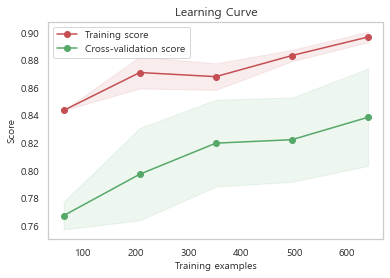

In [185]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# 평가 지표를 계산합니다
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='macro')  # 클래스별 정밀도의 평균
recall = recall_score(y_test, y_test_pred, average='macro')  # 클래스별 재현율의 평균
f1 = f1_score(y_test, y_test_pred, average='macro')  # 클래스별 F1 스코어의 평균
conf_matrix = confusion_matrix(y_test, y_test_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

# 교차검증

from sklearn.model_selection import cross_val_score

# 교차 검증을 수행하며 정확도를 평가
cv_scores = cross_val_score(knn_model, X_scaled, y_train, cv=5, scoring='accuracy')

# 교차 검증 정확도 평균 및 표준편차 계산
mean_cv_accuracy = cv_scores.mean()
std_cv_accuracy = cv_scores.std()

print("교차 검증 정확도 평균:", mean_cv_accuracy)
print("교차 검증 정확도 표준편차:", std_cv_accuracy)

# 훈련데이터 점수와 테스트데이터 점수의 학습곡선 관찰

# 학습 데이터와 테스트 데이터의 점수가 벌어지는 과적합에 대한 학습곡선 관찰
# 학습 데이터 샘플의 개수가 증가함에 따라 학습과 테스트 두 점수가 어떻게 변화하는지 관찰한 그래프
import scikitplot as skplt
skplt.estimators.plot_learning_curve(knn_model, X_scaled, y_train)
plt.show()